In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

This is a statistical analyses on a company that gives loans out to individuals. This company does not use credit rating as a metric, and thereore the company wants an algorthm that correctly predicts the probability of someone defaulting on a loan given a set of key variables.

In [3]:
train = '/Users/bennicholl/Desktop/credit_default_risk/application_train.csv'

train = pd.read_csv(train)
"""gets all the training examples where our target == 1"""
target_is_one = train[train['TARGET'] == 1]
"""gets all the training examples where our target == 0"""
target_is_zero = train[train['TARGET'] == 0]

#below code checks precentages of delinquit males vs delinquit females

"""all of the males that could not pay back their loan"""
males_delinquit = target_is_one[target_is_one['CODE_GENDER'] == 'M']
"""all of the males that could pay back their loan"""
males_good = target_is_zero[target_is_zero['CODE_GENDER'] == 'M']
#P(delinquit | male) = 0.11 
percent_delinquit_males = len(males_delinquit)/len(males_good)

"""all of the females that could not pay back their loan"""
females_delinquit = target_is_one[target_is_one['CODE_GENDER'] == 'F']
"""all of the females that could pay back their loan"""
females_good = target_is_zero[target_is_zero['CODE_GENDER'] == 'F']
#P(delinquit | female) = 0.075
percent_delinquit_females = len(females_delinquit)/len(females_good)

probability of being delinquint if you are a male is:  11.286598025507393 %
probability of being delinquint if you are a female is:  7.526105014924739 %


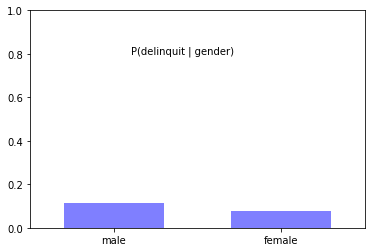

In [5]:
"""create plot"""
fig, ax = plt.subplots(1, 1)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 1)
"""creates bars for delinquent males"""
ax.vlines(0, 0, percent_delinquit_males, colors='b', lw=100, alpha=0.5)
"""creates bars for delinquent females"""
ax.vlines(1, 0, percent_delinquit_females, colors='b', lw=100, alpha=0.5)
"""allows only 0 x value for males and 1 x value for females"""
ax.set_xticks([0,1])
"""get the x_tick labels"""
ticks=ax.get_xticks().tolist()
"""change first tick to male"""
ticks[0] = 'male'
"""change second tick labels to female"""
ticks[1] = 'female'
"""set the newly appointed key/value tick pair"""
ax.set_xticklabels(ticks)
ax.annotate('P(delinquit | gender)', xy=[0.1,0.8])
print("probability of being delinquint if you are a male is: ", percent_delinquit_males * 100, '%')
print("probability of being delinquint if you are a female is: ", percent_delinquit_females * 100, '%')

As you can see, there is a 3.7% difference in the probability of being delinuint based off of gender. The next variables we'll take a look at is having a car vs not having a car

In [6]:
"""gets number of rows where target is one and target does not have a car"""
carless_delinquit = len(target_is_one[target_is_one['FLAG_OWN_CAR'] == 'N'])
# P(not having a car | your delinquit)  =  .695
delinquit_carless = carless_delinquit / len(target_is_one)


has_car_delinquit = len(target_is_one[target_is_one['FLAG_OWN_CAR'] == 'Y'])
# P(having car | your delinquit)  =  .305
delinquit_with_car = has_car_delinquit / len(target_is_one)


probability of not having a car given you are delinquint:  69.48237663645519 %
probability of having a car given you are delinquint:  30.517623363544814 %


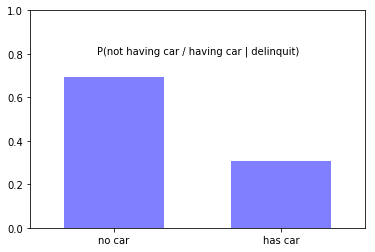

In [7]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 1)
"""creates bars for delinquint with no car"""
ax.vlines(0, 0, delinquit_carless, colors='b', lw=100, alpha=0.5)
"""creates bars for delinquent with car"""
ax.vlines(1, 0, delinquit_with_car, colors='b', lw=100, alpha=0.5)
"""allows only 0 x values for no car and 1 x value for owning a car"""
ax.set_xticks([0,1])
"""get the x_tick labels"""
ticks=ax.get_xticks().tolist()
"""change first tick to no car"""
ticks[0] = 'no car'
"""change second tick labels to has car"""
ticks[1] = 'has car'
"""set the newly appointed key/value tick pair"""
ax.set_xticklabels(ticks)
ax.annotate('P(not having car / having car | delinquit)', xy=[-0.1,0.8])
print('probability of not having a car given you are delinquint: ', delinquit_carless * 100, '%')
print('probability of having a car given you are delinquint: ', delinquit_with_car * 100, '%')



This is a huge differnece! this essintially tells us that in the world of delinquint loan payers, 69.5% of those individuals will not have a car, while only 31% will have a car!

probability of defaulting cash loan given you took out a cash loan is:  8.345912763449208 %
probability of defaulting revolving loan given you took out a revolving loan is:  5.478329177909082 %


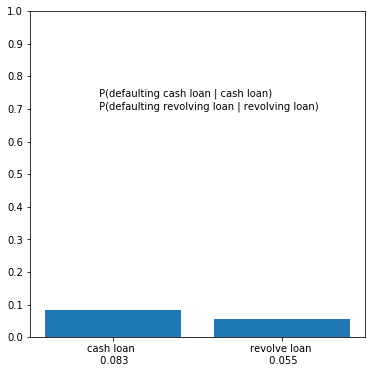

In [8]:
cash_loans = len(target_is_zero[target_is_zero['NAME_CONTRACT_TYPE'] == 'Cash loans'])
cash_loans_defaulted = len(target_is_one[target_is_one['NAME_CONTRACT_TYPE'] == 'Cash loans'])
#P(defaulting | cash loan)
probability_cash_loan = cash_loans_defaulted/(cash_loans + cash_loans_defaulted)


revolve_loans = len(target_is_zero[target_is_zero['NAME_CONTRACT_TYPE'] == 'Revolving loans'])
revolve_loans_defaulted = len(target_is_one[target_is_one['NAME_CONTRACT_TYPE'] == 'Revolving loans'])
#P(defaulting | revolving loan)
probability_revolve_loan = revolve_loans_defaulted/(revolve_loans + revolve_loans_defaulted)

fig = plt.figure(figsize=(6, 6))
loans = fig.add_subplot(111)
loans.set_ylim(0, 1)
loans.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loans.annotate(' P(defaulting cash loan | cash loan) \n P(defaulting revolving loan | revolving loan)', xy=[-0.1,0.7])

loans = plt.bar( [0, 1],[probability_cash_loan, probability_revolve_loan], 
                tick_label = ['cash loan \n {}'.format(round(probability_cash_loan, 3)) , 'revolve loan \n {}'.format(round(probability_revolve_loan, 3)) ])

print("probability of defaulting cash loan given you took out a cash loan is: ", probability_cash_loan * 100, "%")
print("probability of defaulting revolving loan given you took out a revolving loan is: ", probability_revolve_loan * 100, "%")

This difference in percentages was expected. Taking out a full cash loan as oppsed to a loan where you are receving the money periodically is going to be an increase in risk for the lender. 

probability of being delinquint if you own reality:  7.961577407740775 %
probability of being delinquint if you do not own reality:  8.324929139375152 %


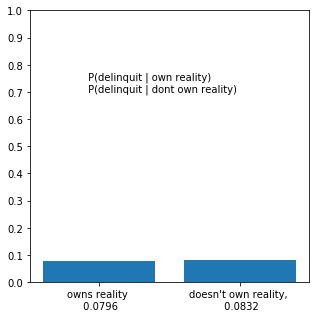

In [9]:
owns_reality = len(target_is_zero[target_is_zero['FLAG_OWN_REALTY'] == 'Y'])
owns_reality_delinquint = len(target_is_one[target_is_one['FLAG_OWN_REALTY'] == 'Y'])
#P(delinquit | own reality)
delinquint_owners = owns_reality_delinquint / (owns_reality_delinquint + owns_reality)

not_own_reality = len(target_is_zero[target_is_zero['FLAG_OWN_REALTY'] == 'N'])
not_own_reality_delinquit = len(target_is_one[target_is_one['FLAG_OWN_REALTY'] == 'N'])
#P(delinquit | dont own reality)
not_delinquit_owners = not_own_reality_delinquit / (not_own_reality_delinquit + not_own_reality)

print("probability of being delinquint if you own reality: ", delinquint_owners * 100, "%")
print("probability of being delinquint if you do not own reality: ", not_delinquit_owners * 100, "%")
fig = plt.figure(figsize=(5, 5))
loans = fig.add_subplot(111)
loans.set_ylim(0, 1)
loans.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loans.annotate(' P(delinquit | own reality) \n P(delinquit | dont own reality)', xy=[-0.1,0.7])

loans = plt.bar( [0, 1],[delinquint_owners, not_delinquit_owners], 
                tick_label = ['owns reality \n {}'.format(round(delinquint_owners, 4)) , "doesn't own reality, \n {}".format(round(not_delinquit_owners, 4)) ])

There is only a 0.63% difference between home owners and non home owners in whether or not they beceome delinquint in payments or not. 

year not delinquint 1.8891994182327803
year delinquint 2.0287829347879023
quarter not delinquint 0.26593850704190924
quarter delinquint 0.259923050698875
month not delinquint 0.2706969392036959
month delinquint 0.22792577801587688
weekly not delinquint 0.03431530316672031
weekly delinquint 0.03491939804217601
daily not delinquint 0.00691357823506166
daily delinquint 0.008035844737739248
hourly not delinquint 0.006379884216916063
hourly delinquint 0.0066721862367895585


Text(2,2,'blue: individuals who are not delinquint in paying back loan \ngreen: individuals who are delinquint in paying back loan')

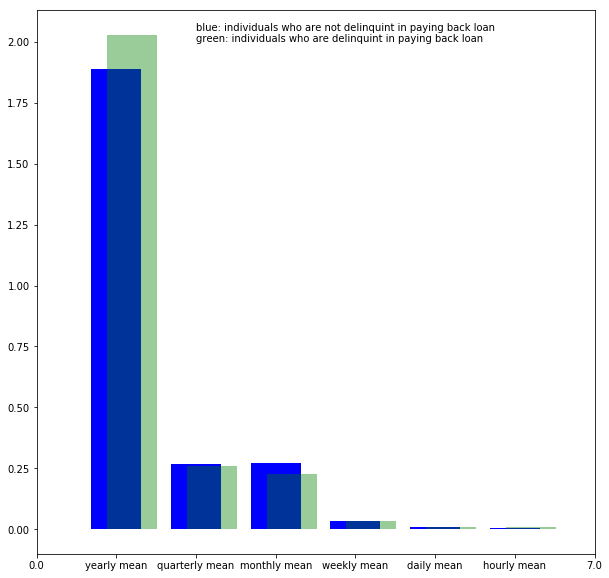

In [10]:
yearly_credit = train['AMT_REQ_CREDIT_BUREAU_YEAR']
"""not delinquint list"""
yearly_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_YEAR']
"""delinquint list"""
yearly_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_YEAR']


"""theese nan probabilities are the same for all of the credit credit inquiries"""
#P(value is nan | individual defaulted)
yearly_nan_default = len([i for i in yearly_credit_one if np.isnan(i) == True]) / len(yearly_credit_one)
#P(value is nan | individual did not default)
yearly_nan_no_default = len([i for i in yearly_credit_zero if np.isnan(i) == True]) / len(yearly_credit_zero)


"""not delinquint list"""
quarter_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_QRT']
"""delinquint list"""
quarter_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_QRT']


"""not delinquint list"""
monthly_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_MON']
"""delinquint list"""
monthly_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_MON']

"""not delinquint list"""
weekly_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_WEEK']
"""delinquint list"""
weekly_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_WEEK']

"""not delinquint list"""
daily_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_DAY']
"""delinquint list"""
daily_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_DAY']


"""not delinquint list"""
hourly_credit_zero = target_is_zero['AMT_REQ_CREDIT_BUREAU_HOUR']
"""delinquint list"""
hourly_credit_one = target_is_one['AMT_REQ_CREDIT_BUREAU_HOUR']


print('year not delinquint', yearly_credit_zero.mean())
print('year delinquint', yearly_credit_one.mean())

print('quarter not delinquint', quarter_credit_zero.mean())
print('quarter delinquint', quarter_credit_one.mean())

print('month not delinquint', monthly_credit_zero.mean())
print('month delinquint', monthly_credit_one.mean())

print('weekly not delinquint', weekly_credit_zero.mean())
print('weekly delinquint', weekly_credit_one.mean())

print('daily not delinquint', daily_credit_zero.mean())
print('daily delinquint', daily_credit_one.mean())    

print('hourly not delinquint', hourly_credit_zero.mean())
print('hourly delinquint', hourly_credit_one.mean())   

fig = plt.figure(figsize=(10, 10))
credit = fig.add_subplot(111)

credit.set_xlim(0.0, 7.0)

credit.vlines(1.0, 0, yearly_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(1.2, 0, yearly_credit_one.mean(), colors='g', lw=50, alpha=0.4)

credit.vlines(2, 0, quarter_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(2.2, 0, quarter_credit_one.mean(), colors='g', lw=50, alpha=0.4)

credit.vlines(3, 0, monthly_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(3.2, 0, monthly_credit_one.mean(), colors='g', lw=50, alpha=0.4)

credit.vlines(4, 0, weekly_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(4.2, 0, weekly_credit_one.mean(), colors='g', lw=50, alpha=0.4)

credit.vlines(5, 0, daily_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(5.2, 0, daily_credit_one.mean(), colors='g', lw=50, alpha=0.4)

credit.vlines(6, 0, hourly_credit_zero.mean(), colors='b', lw=50, alpha=1)
credit.vlines(6.2, 0, hourly_credit_one.mean(), colors='g', lw=50, alpha=0.4)

ticks=credit.get_xticks().tolist()
ticks[1],ticks[2],ticks[3],ticks[4],ticks[5],ticks[6] = ['yearly mean', 'quarterly mean', 'monthly mean', 'weekly mean', 'daily mean', 'hourly mean']
"""set the newly appointed x values"""
credit.set_xticklabels(ticks)

credit.annotate("blue: individuals who are not delinquint in paying back loan \ngreen: individuals who are delinquint in paying back loan", 
                xy = [2,2])

The above bar chart shows the mean value of credit inquiries per year, quarter, month, etc.
The purposre for this is to try and understand if there is any coorelation between people becomoing delinquint on a loan, and the amount of loans(because that triggers a credit inquiry) they apply for. 
As you can see from the chart, the average amount of credit inquires is slightly higher for delinquint customers in the yearly credit inquiries, but the oppsoite is true for quarterly and monthly. The difference in weekly, daily and hourly credit inquiries averages are also minimal. Therefore, I conlclude this vairable to be of minimal importance. If I include this in the neural net, I'll proablle either just use the yearly credit inquires mean since there is more information, or run a PCA on all the variables.

average income is: $ 166035


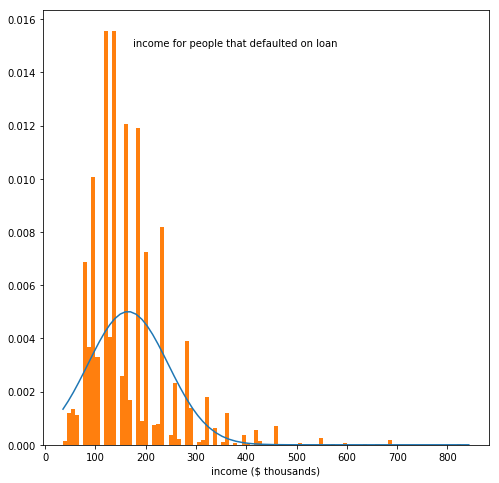

average income is: $ 174180


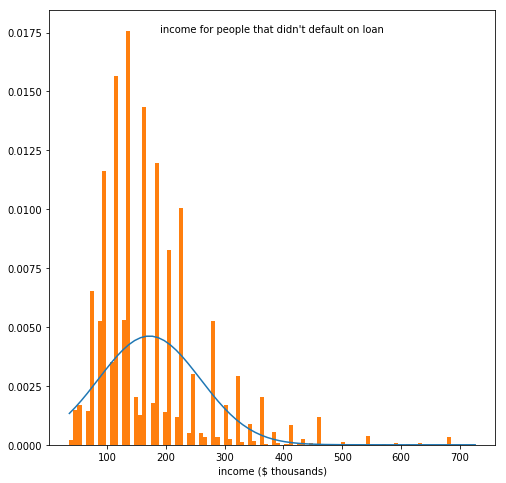

In [11]:
income_for_defaults = target_is_one['AMT_INCOME_TOTAL']
income_for_defaults = np.sort(income_for_defaults)

list_of_frequencies = []
cooresponding_income = []

frequency_count = 0
"""count until our minumum integer + 10000"""
count_until = income_for_defaults.min() + 10000
for e,i in enumerate(income_for_defaults):
    if i < count_until:
        frequency_count += 1
    else:
        cooresponding_income.append(count_until)
        list_of_frequencies.append(frequency_count)
        """now count until our current integer + 10000"""
        count_until = i + 10000
        frequency_count = 1
        """if our iteration is our last element"""
    if e+1 == len(income_for_defaults):    
        cooresponding_income.append(count_until)
        list_of_frequencies.append(frequency_count)

scaled_cooresponding_income = (np.array(cooresponding_income) * .001).tolist()

new_li = []
for e,i in enumerate(scaled_cooresponding_income):
    new_li.append( [i] * list_of_frequencies[e] )
scaled_cooresponding_income = [ii for i in new_li for ii in i]
del(scaled_cooresponding_income[-1])


fit = stats.norm.pdf(scaled_cooresponding_income[:24800], np.mean(scaled_cooresponding_income[:24800]), np.std(scaled_cooresponding_income[:24800]))
plt.figure(figsize=(8, 8))
plt.plot(scaled_cooresponding_income[:24800], fit)


plt.annotate("income for people that defaulted on loan", xy=[175,0.015])
plt.xlabel('income ($ thousands)')
plt.hist(scaled_cooresponding_income[:24800], 100, density = True)
print('average income is: $', int(np.mean(scaled_cooresponding_income) * 1000))
plt.show()


income_for_non_defaults = target_is_zero['AMT_INCOME_TOTAL']
income_for_non_defaults = np.sort(income_for_non_defaults)

list_of_frequencies = []
cooresponding_income = []

frequency_count = 0
"""count until our minumum integer + 10000"""
count_until = income_for_non_defaults.min() + 10000
for e,i in enumerate(income_for_non_defaults):
    if i < count_until:
        frequency_count += 1
    else:
        cooresponding_income.append(count_until)
        list_of_frequencies.append(frequency_count)
        """now count until our current integer + 10000"""
        count_until = i + 10000
        frequency_count = 1
        """if our iteration is our last element"""
    if e+1 == len(income_for_non_defaults):    
        cooresponding_income.append(count_until)
        list_of_frequencies.append(frequency_count)


scaled_cooresponding_income = (np.array(cooresponding_income) * .001).tolist()

new_li = []
for e,i in enumerate(scaled_cooresponding_income):
    new_li.append( [i] * list_of_frequencies[e] )
scaled_cooresponding_income = [ii for i in new_li for ii in i]
del(scaled_cooresponding_income[-1])


fit = stats.norm.pdf(scaled_cooresponding_income[:282000], np.mean(scaled_cooresponding_income[:282000]), np.std(scaled_cooresponding_income[:282000]))
plt.figure(figsize=(8, 8))
plt.plot(scaled_cooresponding_income[:282000], fit)

plt.hist(scaled_cooresponding_income[:282000], 100, density = True)
plt.annotate("income for people that didn't default on loan", xy=[190,0.0175])
plt.xlabel('income ($ thousands)')
print('average income is: $', int(np.mean(scaled_cooresponding_income) * 1000))
plt.show()

The distributions of individuals that defaulted on a loas vs the individuals that did not default on a loan are somewhat similiar. It is also worth noting that the means of the distribution are only $8,145 dollars apart. This must be due to the fact that the credit lenders are already taking into account various statistical measurues when allocating their loans to individuals. In hindsight, I think it makes sense that their is minimal diference in distributions between delinquint lendee's and non delinquint lendee's. Lets check out the distributions associated with the amount of credit lines individuals are recieveing, and the distributions with respect to delinquint and non delinquint lendee's

average credit line for people that defaulted on loan: 510.523911376
average credit line for people that didn't default on loan: 539.198784163


Text(0.5,0,'credit line ($ thousands)')

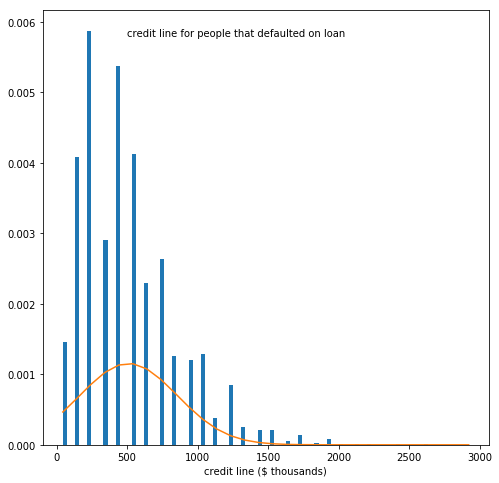

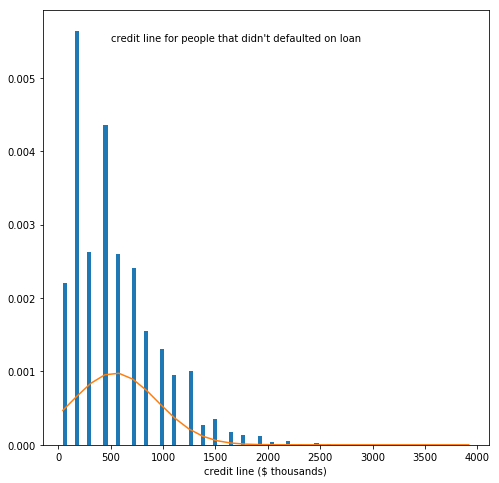

In [12]:
delinquint_credit_amount = np.sort(np.array(target_is_one['AMT_CREDIT']))
"""get rid of last element becuase it is an outlier and it dicks up the histogram"""
delinquint_credit_amount = delinquint_credit_amount[:-1]

"""scale and calculate bins for histogram"""
delinquint = np.histogram((delinquint_credit_amount * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * delinquint[0][e])
scaled_cooresponding_credit = [ii for i in new_li for ii in i]

fig = plt.figure(figsize=(8, 8))
delinquint_credit_loan = fig.add_subplot(111)

print("average credit line for people that defaulted on loan:", np.mean(scaled_cooresponding_credit))

"""creates histograms"""
delinquint_credit_loan.hist(scaled_cooresponding_credit, 100, density = True)
"""gets y values for normal distribution"""
fit_delinquint = stats.norm.pdf(scaled_cooresponding_credit, np.mean(scaled_cooresponding_credit), np.std(scaled_cooresponding_credit))
"""plots normal distribution"""
delinquint_credit_loan.plot(scaled_cooresponding_credit, fit_delinquint)

delinquint_credit_loan.annotate("credit line for people that defaulted on loan", xy=[500,0.0058])
delinquint_credit_loan.set_xlabel('credit line ($ thousands)')



not_delinquint_credit_amount = np.sort(np.array(target_is_zero['AMT_CREDIT']))
not_delinquint = np.histogram((not_delinquint_credit_amount * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(not_delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * not_delinquint[0][e])
scaled_cooresponding_credit = [ii for i in new_li for ii in i]

fig_two = plt.figure(figsize=(8, 8))
not_delinquint_credit_loan = fig_two.add_subplot(111)

print("average credit line for people that didn't default on loan:", np.mean(scaled_cooresponding_credit))

"""creates histograms"""
not_delinquint_credit_loan.hist(scaled_cooresponding_credit, 100, density = True)
"""gets y values for normal distribution"""
fit_not_delinquint = stats.norm.pdf(scaled_cooresponding_credit, np.mean(scaled_cooresponding_credit), np.std(scaled_cooresponding_credit))
"""plots normal distribution"""
not_delinquint_credit_loan.plot(scaled_cooresponding_credit, fit_not_delinquint)

not_delinquint_credit_loan.annotate("credit line for people that didn't defaulted on loan", xy=[500,0.0055])
not_delinquint_credit_loan.set_xlabel('credit line ($ thousands)')

From looking at the two charts we see not only the increased average for people that didn't default on the loan, but also the increase in people with loans excedding $200,000, which seems to be the main reason for the increased average. It seems as though the bigger the credit line, the less likely individuals are to default on loans. This probally has something to do with the current statistical paramters the credit lenders algorithm uses. It generally will give bigger loans to individuals who are less liky to defualt, and their statisitcal parameters obviously seem to be working, at least somewhat. 

average annuity loan for people that defaulted on loan: 23.9079137221
average annuity loan for people that didn't default on loan: 22.7923907186


[Text(0,0,'-20'),
 Text(0,0,'0'),
 Text(0,0,'20'),
 Text(0,0,'40'),
 Text(0,0,'60'),
 Text(0,0,'80'),
 Text(0,0,'100'),
 Text(0,0,'120')]

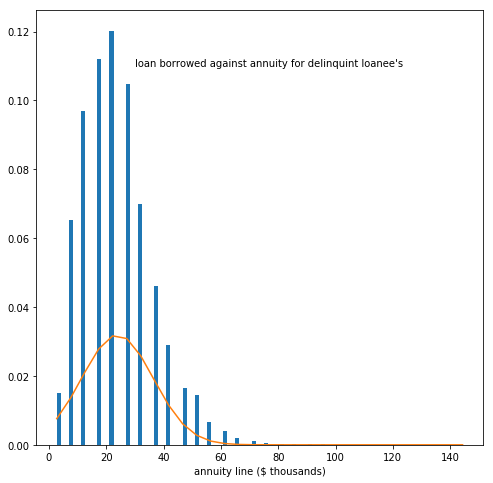

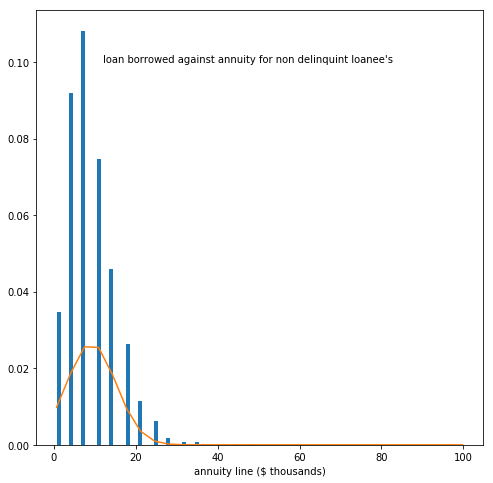

In [13]:
delinquint_annuity_amount = np.sort(np.array(target_is_one['AMT_ANNUITY']))

"""scale and calculate bins for histogram"""
delinquint = np.histogram((delinquint_annuity_amount * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * delinquint[0][e])
scaled_cooresponding_credit = [ii for i in new_li for ii in i]

fig = plt.figure(figsize=(8, 8))
delinquint_annuity_loan = fig.add_subplot(111)

print("average annuity loan for people that defaulted on loan:", np.mean(scaled_cooresponding_credit))

"""creates histograms"""
delinquint_annuity_loan.hist(scaled_cooresponding_credit, 100, density = True)
"""gets y values for normal distribution"""
fit_delinquint = stats.norm.pdf(scaled_cooresponding_credit, np.mean(scaled_cooresponding_credit), np.std(scaled_cooresponding_credit))
"""plots normal distribution"""
delinquint_annuity_loan.plot(scaled_cooresponding_credit, fit_delinquint)

delinquint_annuity_loan.annotate("loan borrowed against annuity for delinquint loanee's", xy=[30,0.11])
delinquint_annuity_loan.set_xlabel('annuity line ($ thousands)')
ticks = delinquint_annuity_loan.get_xticks().tolist()
ticks = [int(i) for i in ticks]


not_delinquint_annuity_amount = np.sort(np.array(target_is_zero['AMT_ANNUITY']))
not_delinquint_annuity_amount = not_delinquint_annuity_amount[~np.isnan(not_delinquint_annuity_amount)]
not_delinquint = np.histogram((not_delinquint_annuity_amount * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(not_delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * not_delinquint[0][e])
scaled_cooresponding_credit = [ii for i in new_li for ii in i]

fig_two = plt.figure(figsize=(8, 8))
not_delinquint_annuity_loan = fig_two.add_subplot(111)

print("average annuity loan for people that didn't default on loan:", np.mean(scaled_cooresponding_credit))

"""creates histograms"""
not_delinquint_annuity_loan.hist(scaled_cooresponding_credit, 100, density = True)
"""gets y values for normal distribution"""
fit_not_delinquint = stats.norm.pdf(scaled_cooresponding_credit, np.mean(scaled_cooresponding_credit), np.std(scaled_cooresponding_credit))
"""plots normal distribution"""
not_delinquint_annuity_loan.plot(scaled_cooresponding_credit, fit_not_delinquint)

not_delinquint_annuity_loan.annotate("loan borrowed against annuity for non delinquint loanee's", xy=[30,0.10])
not_delinquint_annuity_loan.set_xlabel('annuity line ($ thousands)')
not_delinquint_annuity_loan.set_xticklabels(ticks)


Notice how these figures seem to be opposite of the credit line and price of good distributions, where this average increases just over 1% for loans for where the loanee's are delinquint. The parameters associated with taking out a loan on your own annuity are obviously nowhere near as strict as taking out a credit loan where the bank is giving you money. The lendee is not taking any real risk if you default on your own annuity, therefore, as said before, the requirements are easier which is the reason why the average amount in dollars is slightly more for delinquint loanee's then it is for non delinquint loanee's. 

average price of good loan was taken out for, for people that defaulted: 434.998004354
average price of good loan was taken out for, for people that didn't default: 483.94198241


Text(0.5,0,'price($ thousands)')

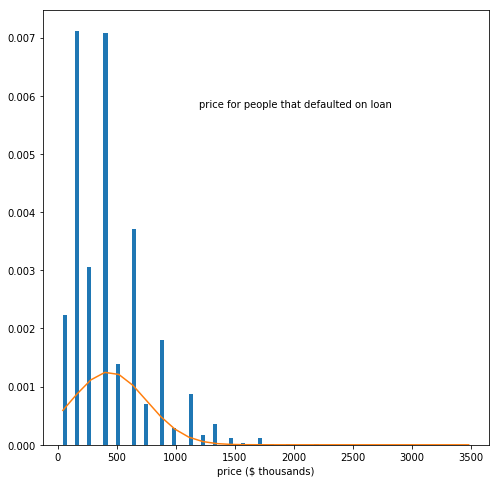

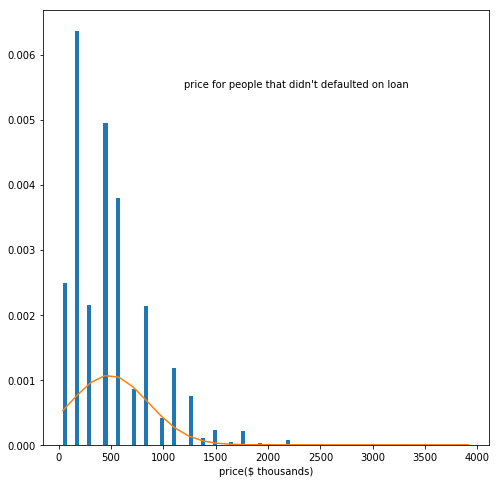

In [14]:
delinquint_price = np.sort(np.array(target_is_one['AMT_GOODS_PRICE']))
delinquint_price = delinquint_price [~np.isnan(delinquint_price )]
"""scale and calculate bins for histogram"""
delinquint = np.histogram((delinquint_price * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * delinquint[0][e])
scaled_cooresponding_price = [ii for i in new_li for ii in i]

fig = plt.figure(figsize=(8, 8))
delinquint_price = fig.add_subplot(111)

print("average price of good loan was taken out for, for people that defaulted:", np.mean(scaled_cooresponding_price))

"""creates histograms"""
delinquint_price.hist(scaled_cooresponding_price, 100, density = True)
"""gets y values for normal distribution"""
fit_delinquint = stats.norm.pdf(scaled_cooresponding_price, np.mean(scaled_cooresponding_price), np.std(scaled_cooresponding_price))
"""plots normal distribution"""
delinquint_price.plot(scaled_cooresponding_price, fit_delinquint)

delinquint_price.annotate("price for people that defaulted on loan", xy=[1200,0.0058])
delinquint_price.set_xlabel('price ($ thousands)')




not_delinquint_price = np.sort(np.array(target_is_zero['AMT_GOODS_PRICE']))
not_delinquint_price = not_delinquint_price[~np.isnan(not_delinquint_price)]
"""scale and calculate bins for histogram"""
not_delinquint = np.histogram((not_delinquint_price  * .001), bins = 30)

"""numpy.hist has an extra element in the value array because the count array counts from the 
first to the second number in value array, so we delete the last element here"""
remove_last_element = np.delete(not_delinquint[1],-1)

new_li = []
for e,i in enumerate(remove_last_element):
    new_li.append( [i] * not_delinquint[0][e])
scaled_cooresponding_price = [ii for i in new_li for ii in i]

fig_two = plt.figure(figsize=(8, 8))
not_delinquint_price = fig_two.add_subplot(111)

print("average price of good loan was taken out for, for people that didn't default:", np.mean(scaled_cooresponding_price))

"""creates histograms"""
not_delinquint_price.hist(scaled_cooresponding_price, 100, density = True)
"""gets y values for normal distribution"""
fit_not_delinquint = stats.norm.pdf(scaled_cooresponding_price, np.mean(scaled_cooresponding_price), np.std(scaled_cooresponding_price))
"""plots normal distribution"""
not_delinquint_price.plot(scaled_cooresponding_price, fit_not_delinquint)

not_delinquint_price.annotate("price for people that didn't defaulted on loan", xy=[1200,0.0055])
not_delinquint_price.set_xlabel('price($ thousands)')

The output were getting here is very similiar to the output associated with credit loans amount for obvious reasons. 

[Text(0,0,'0.0'),
 Text(0,0,'pensioner'),
 Text(0,0,'maternity'),
 Text(0,0,'unemployed'),
 Text(0,0,'businessman'),
 Text(0,0,'state servant'),
 Text(0,0,'commercial associate'),
 Text(0,0,'student'),
 Text(0,0,'working'),
 Text(0,0,'9.0')]

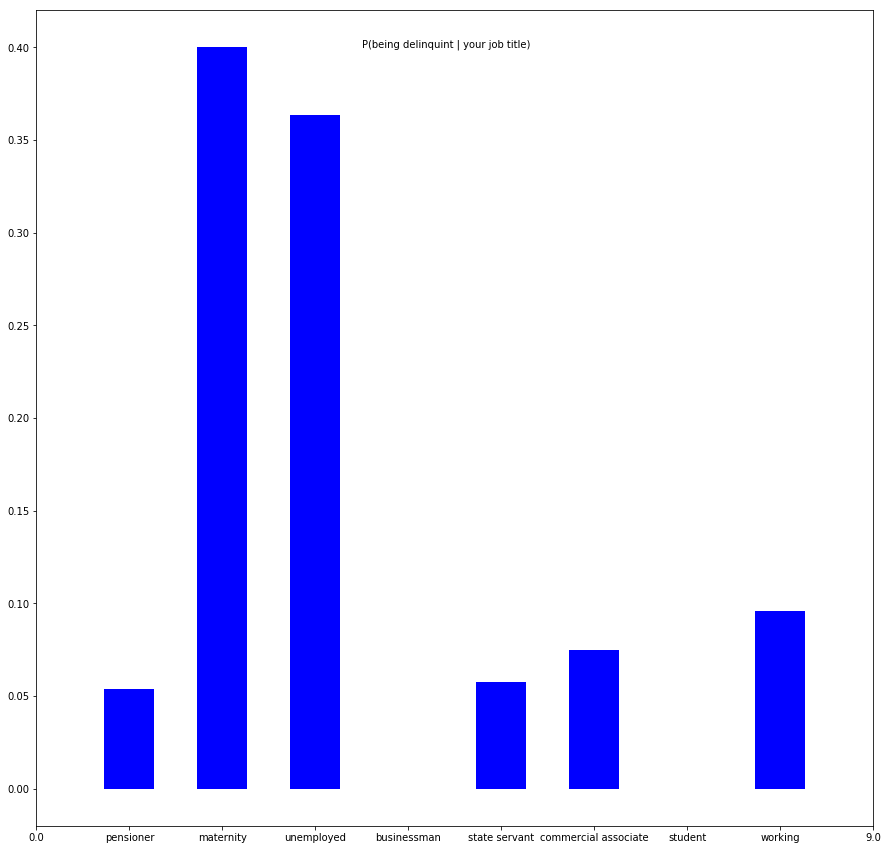

In [15]:
"""delinquint list"""
not_delinquint_job = target_is_zero['NAME_INCOME_TYPE']
"""this list has all of the job categories in being delinquint and not delinquint"""
jobs = list(set(not_delinquint_job))
jobs.sort()

not_del_pensioner = not_delinquint_job[not_delinquint_job == jobs[3]]
not_del_maternity_leave = not_delinquint_job[not_delinquint_job == jobs[2]]
not_del_unemployed = not_delinquint_job[not_delinquint_job == jobs[6]]
not_del_businessman = not_delinquint_job[not_delinquint_job == jobs[0]]
not_del_state_servant = not_delinquint_job[not_delinquint_job == jobs[4]]
not_del_comercial_associate = not_delinquint_job[not_delinquint_job == jobs[1]]
not_del_student = not_delinquint_job[not_delinquint_job == jobs[5]]
not_del_working = not_delinquint_job[not_delinquint_job == jobs[7]]


"""not delinquint list"""
delinquint_job = target_is_one['NAME_INCOME_TYPE']

del_pensioner = delinquint_job[delinquint_job == jobs[3]]
del_maternity_leave = delinquint_job[delinquint_job == jobs[2]]
del_unemployed = delinquint_job[delinquint_job == jobs[6]]
del_businessman = delinquint_job[delinquint_job == jobs[0]]
del_state_servant = delinquint_job[delinquint_job == jobs[4]]
del_comercial_associate = delinquint_job[delinquint_job == jobs[1]]
del_student = delinquint_job[delinquint_job == jobs[5]]
del_working = delinquint_job[delinquint_job == jobs[7]]

#P(being delinquint | your job title)
prob_pensioner = len(del_pensioner) / (len(del_pensioner) + len(not_del_pensioner) )
prob_maternity = len(del_maternity_leave) / (len(del_maternity_leave) + len(not_del_maternity_leave) )
prob_unemployed = len(del_unemployed) / (len(del_unemployed) + len(not_del_unemployed) )
prob_businessman = len(del_businessman) / (len(del_businessman) + len(not_del_businessman))
prob_state_servant = len(del_state_servant) / (len(del_state_servant) + len(not_del_state_servant))
prob_comercial_associate = len(del_comercial_associate) / (len(del_comercial_associate) + len(not_del_comercial_associate))
prob_student = len(del_student) / (len(del_student) + len(not_del_student))
prob_working = len(del_working) / (len(del_working) + len(not_del_working))


fig = plt.figure(figsize=(15, 15))
job = fig.add_subplot(111)
job.set_xlim(0.0, 9.0)

job.vlines(1.0, 0, prob_pensioner, colors='b', lw=50, alpha=1)
job.vlines(2.0, 0, prob_maternity, colors='b', lw=50, alpha=1)
job.vlines(3.0, 0, prob_unemployed, colors='b', lw=50, alpha=1)
job.vlines(4.0, 0, prob_businessman, colors='b', lw=50, alpha=1)
job.vlines(5.0, 0, prob_state_servant, colors='b', lw=50, alpha=1)
job.vlines(6.0, 0, prob_comercial_associate, colors='b', lw=50, alpha=1)
job.vlines(7.0, 0, prob_student, colors='b', lw=50, alpha=1)
job.vlines(8.0, 0, prob_working, colors='b', lw=50, alpha=1)

job.annotate("P(being delinquint | your job title)", xy=[3.5,0.4])

ticks = job.get_xticks().tolist()
ticks[1],ticks[2],ticks[3],ticks[4],ticks[5],ticks[6],ticks[7],ticks[8] = ['pensioner', 'maternity', 'unemployed',
     'businessman', 'state servant', 'commercial associate', 'student', 'working']
"""set the newly appointed x values"""
job.set_xticklabels(ticks)


Here is a probability distribution of the probability og being delinquint on a payment given your job status. maternity leave leads as the highest, with a probability of 40%. Businessman and student are the lowest, at 0 percent. This data can be misleading. Take the student dimension as an example. This is probably zero due to the fact that if a student takes out a loan, he needs a cosigner to sign for his loan, therefore this probability distribution seems to be dependant on other variables. Either way, a neural net will pick up on thee dependancies, and therefore I will include this feature in the algorithm

yearly amount of inquiries for delinquint loanees:  1.6404102077923917
yearly amount of inquiries for non delinquint loanees:  1.6780261832829808
quarterly amount of inquiries for delinquint loanees:  0.2309169891681937
quarterly amount of inquiries for non delinquint loanees:  0.21498489425981873
monthly amount of inquiries for delinquint loanees:  0.23504878204085097
monthly amount of inquiries for non delinquint loanees:  0.18851963746223566
weekly amount of inquiries for delinquint loanees:  0.02979631110136335
weekly amount of inquiries for non delinquint loanees:  0.028882175226586104
daily amount of inquiries for delinquint loanees:  0.006003127144605676
daily amount of inquiries for non delinquint loanees:  0.006646525679758308
hourly amount of inquiries for delinquint loanees:  0.0055397154439908594
hourly amount of inquiries for non delinquint loanees:  0.005518630412890232


Text(2,1.5,'blue: average credit inquiries for individuals who are not delinquint \ngreen: average credit inquiries for individuals who are delinquint')

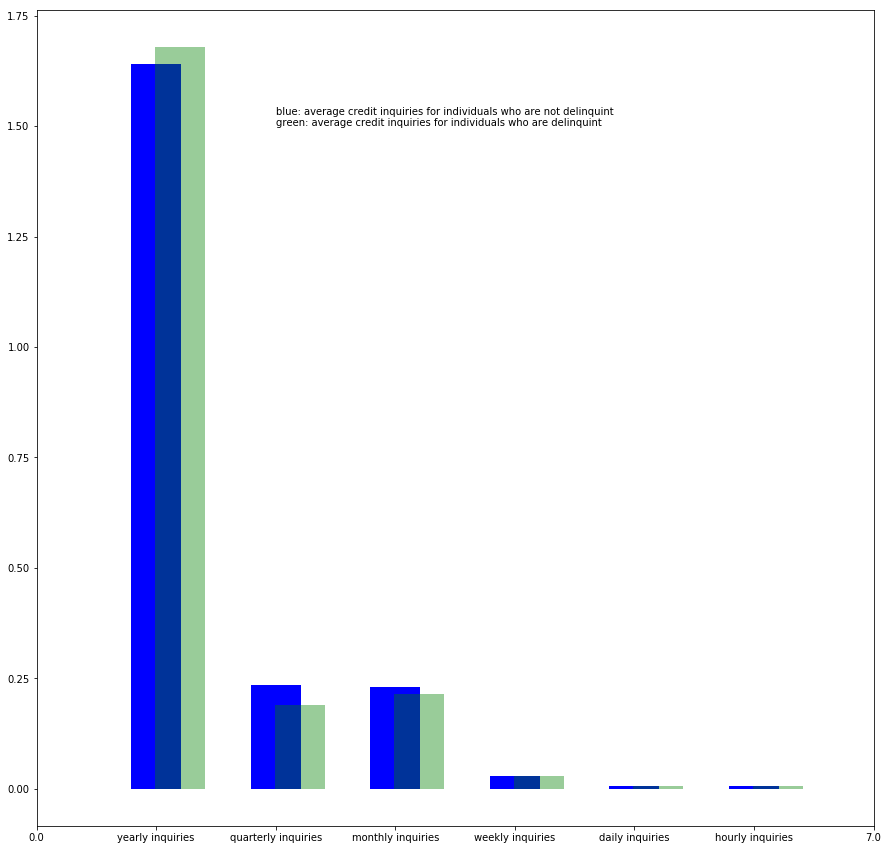

In [16]:
#YEAR
"""get the average value of credit inquiries per non delinquint loanees"""
inquiries_non_delinquint_y = target_is_zero['AMT_REQ_CREDIT_BUREAU_YEAR']
inquiries_non_delinquint_y = target_is_zero['AMT_REQ_CREDIT_BUREAU_YEAR'].replace(np.nan, 0)
inquiries_non_delinquint_y = sum(inquiries_non_delinquint_y) / len(target_is_zero)

"""get the average value of credit inquiries per delinquint loanees"""
inquiries_delinquint_y = target_is_one['AMT_REQ_CREDIT_BUREAU_YEAR']
inquiries_delinquint_y = target_is_one['AMT_REQ_CREDIT_BUREAU_YEAR'].replace(np.nan, 0)
inquiries_delinquint_y = sum(inquiries_delinquint_y) / len(target_is_one)

#QUARTER
"""get the average value of credit inquiries per non delinquint loanees"""
inquiries_non_delinquint_q = target_is_zero['AMT_REQ_CREDIT_BUREAU_QRT']
inquiries_non_delinquint_q = target_is_zero['AMT_REQ_CREDIT_BUREAU_QRT'].replace(np.nan, 0)
inquiries_non_delinquint_q = sum(inquiries_non_delinquint_q) / len(target_is_zero)

"""get the average value of credit inquiries per delinquint loanees"""
inquiries_delinquint_q = target_is_one['AMT_REQ_CREDIT_BUREAU_QRT']
inquiries_delinquint_q = target_is_one['AMT_REQ_CREDIT_BUREAU_QRT'].replace(np.nan, 0)
inquiries_delinquint_q = sum(inquiries_delinquint_q) / len(target_is_one)


#MONTH
"""get the average value of credit inquiries per non delinquint loanees"""
inquiries_non_delinquint_m = target_is_zero['AMT_REQ_CREDIT_BUREAU_MON']
inquiries_non_delinquint_m = target_is_zero['AMT_REQ_CREDIT_BUREAU_MON'].replace(np.nan, 0)
inquiries_non_delinquint_m = sum(inquiries_non_delinquint_m) / len(target_is_zero)

"""get the average value of credit inquiries per delinquint loanees"""
inquiries_delinquint_m = target_is_one['AMT_REQ_CREDIT_BUREAU_MON']
inquiries_delinquint_m = target_is_one['AMT_REQ_CREDIT_BUREAU_MON'].replace(np.nan, 0)
inquiries_delinquint_m = sum(inquiries_delinquint_m) / len(target_is_one)

#WEEK
"""get the average value of credit inquiries per non delinquint loanees"""
inquiries_non_delinquint_w = target_is_zero['AMT_REQ_CREDIT_BUREAU_WEEK']
inquiries_non_delinquint_w = target_is_zero['AMT_REQ_CREDIT_BUREAU_WEEK'].replace(np.nan, 0)
inquiries_non_delinquint_w = sum(inquiries_non_delinquint_w) / len(target_is_zero)

"""get the average value of credit inquiries per delinquint loanees"""
inquiries_delinquint_w = target_is_one['AMT_REQ_CREDIT_BUREAU_WEEK']
inquiries_delinquint_w = target_is_one['AMT_REQ_CREDIT_BUREAU_WEEK'].replace(np.nan, 0)
inquiries_delinquint_w = sum(inquiries_delinquint_w) / len(target_is_one)


#DAY
"""get the average value of credit inquiries per non delinquint loanees"""
inquiries_non_delinquint_d = target_is_zero['AMT_REQ_CREDIT_BUREAU_DAY']
inquiries_non_delinquint_d = target_is_zero['AMT_REQ_CREDIT_BUREAU_DAY'].replace(np.nan, 0)
inquiries_non_delinquint_d = sum(inquiries_non_delinquint_d) / len(target_is_zero)

"""get the average value of credit inquiries per delinquint loanees"""
inquiries_delinquint_d = target_is_one['AMT_REQ_CREDIT_BUREAU_DAY']
inquiries_delinquint_d = target_is_one['AMT_REQ_CREDIT_BUREAU_DAY'].replace(np.nan, 0)
inquiries_delinquint_d = sum(inquiries_delinquint_d) / len(target_is_one)

#HOUR
"""get the average value of credit inquiries per non delinquint loanees"""
inquiries_non_delinquint_h = target_is_zero['AMT_REQ_CREDIT_BUREAU_HOUR']
inquiries_non_delinquint_h = target_is_zero['AMT_REQ_CREDIT_BUREAU_HOUR'].replace(np.nan, 0)
inquiries_non_delinquint_h = sum(inquiries_non_delinquint_h) / len(target_is_zero)

"""get the average value of credit inquiries per delinquint loanees"""
inquiries_delinquint_h = target_is_one['AMT_REQ_CREDIT_BUREAU_HOUR']
inquiries_delinquint_h = target_is_one['AMT_REQ_CREDIT_BUREAU_HOUR'].replace(np.nan, 0)
inquiries_delinquint_h = sum(inquiries_delinquint_h) / len(target_is_one)




print("yearly amount of inquiries for delinquint loanees: ", inquiries_non_delinquint_y)
print("yearly amount of inquiries for non delinquint loanees: ",inquiries_delinquint_y)
print("quarterly amount of inquiries for delinquint loanees: ", inquiries_non_delinquint_q)
print("quarterly amount of inquiries for non delinquint loanees: ",inquiries_delinquint_q)
print("monthly amount of inquiries for delinquint loanees: ", inquiries_non_delinquint_m)
print("monthly amount of inquiries for non delinquint loanees: ",inquiries_delinquint_m)
print("weekly amount of inquiries for delinquint loanees: ", inquiries_non_delinquint_w)
print("weekly amount of inquiries for non delinquint loanees: ",inquiries_delinquint_w)
print("daily amount of inquiries for delinquint loanees: ", inquiries_non_delinquint_d)
print("daily amount of inquiries for non delinquint loanees: ",inquiries_delinquint_d)
print("hourly amount of inquiries for delinquint loanees: ", inquiries_non_delinquint_h)
print("hourly amount of inquiries for non delinquint loanees: ",inquiries_delinquint_h)



fig = plt.figure(figsize=(15, 15))
inquiries = fig.add_subplot(111)

inquiries.set_xlim(0.0, 7.0)

inquiries.vlines(1.0, 0, inquiries_non_delinquint_y, colors='b', lw=50, alpha=1)
inquiries.vlines(1.2, 0, inquiries_delinquint_y, colors='g', lw=50, alpha=0.4)

inquiries.vlines(2, 0, inquiries_non_delinquint_m, colors='b', lw=50, alpha=1)
inquiries.vlines(2.2, 0, inquiries_delinquint_m, colors='g', lw=50, alpha=0.4)

inquiries.vlines(3, 0, inquiries_non_delinquint_q, colors='b', lw=50, alpha=1)
inquiries.vlines(3.2, 0, inquiries_delinquint_q, colors='g', lw=50, alpha=0.4)

inquiries.vlines(4, 0, inquiries_non_delinquint_w, colors='b', lw=50, alpha=1)
inquiries.vlines(4.2, 0, inquiries_delinquint_w, colors='g', lw=50, alpha=0.4)

inquiries.vlines(5, 0, inquiries_non_delinquint_d, colors='b', lw=50, alpha=1)
inquiries.vlines(5.2, 0, inquiries_delinquint_d, colors='g', lw=50, alpha=0.4)

inquiries.vlines(6, 0, inquiries_non_delinquint_h, colors='b', lw=50, alpha=1)
inquiries.vlines(6.2, 0, inquiries_delinquint_h, colors='g', lw=50, alpha=0.4)

ticks = inquiries.get_xticks().tolist()
ticks[1],ticks[2],ticks[3],ticks[4],ticks[5],ticks[6] = ['yearly inquiries', 'quarterly inquiries', 'monthly inquiries', 'weekly inquiries', 'daily inquiries', 'hourly inquiries']
"""set the newly appointed x values"""
inquiries.set_xticklabels(ticks)

inquiries.annotate("blue: average credit inquiries for individuals who are not delinquint \ngreen: average credit inquiries for individuals who are delinquint", 
                xy = [2,1.5])


This gives us the average amount of credit inquires based off of whether the inquiry was for a delinquint loanee or a non delinquint loanee. As you can see from the averages, there does not seem to be any consensus betwen being delinquint and not being delinquint, and having a greate average of credit inquiries. As of now, I beleive I am going to remove these features from my database, so these features will not be included into the algorithm. I may also run a pca and take maybe one principal component dimension from these features 

doc 2 percentage difference:  0.012929045018650331
doc 3 percentage difference:  7.38651428525178
doc 4 percentage difference:  0.008844
doc 5 percentage difference:  0.014142964727248408
doc 6 percentage difference:  2.9752321919439995
doc 7 percentage difference:  0.007725
doc 8 percentage difference:  0.8069704575227821
doc 9 percentage difference:  0.09952770787160503
doc 10 percentage difference:  0.002476
doc 11 percentage difference:  0.09691450804906188
doc 12 percentage difference:  0.000707
doc 13 percentage difference:  0.25200593538039495
doc 14 percentage difference:  0.18797729582979983
doc 15 percentage difference:  0.08339335851301755
doc 16 percentage difference:  0.42270487128727163
doc 17 percentage difference:  0.020243556419241582
doc 18 percentage difference:  0.26213703290929313
doc 19 percentage difference:  0.012152777072715892
doc 20 percentage difference:  0.001780
doc 21 percentage difference:  0.024911067652777508


Text(7,1.01,'blue: P(not signing document | you are not delinquint) \ngreen: P(not signing document | you are delinquint)')

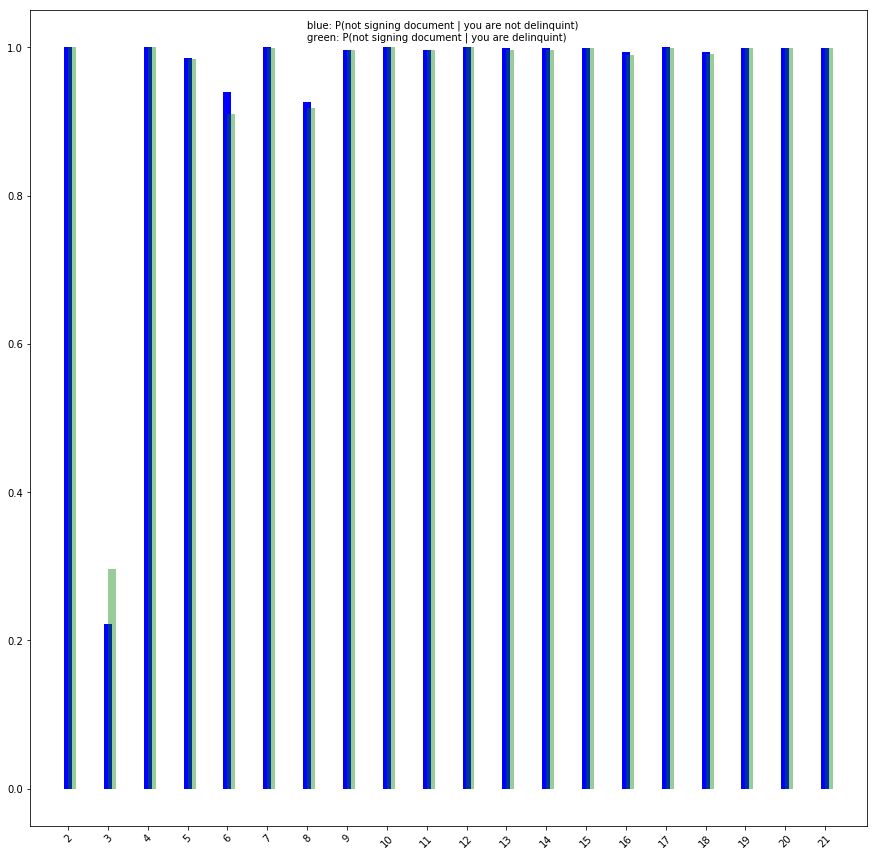

In [17]:
#P(not signing doc 2 \ your not delinquint)
"""didn't sign document 2"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_2']== 0])
"""did sign document 2"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_2']== 1])
doc_2_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 2 \ your delinquint)
"""didn't sign document 2"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_2']== 0])
"""did sign document 2"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_2']== 1])
doc_2_del = del_zero / (del_zero + del_one)#


#P(not signing doc 3 \ your not delinquint)
"""didn't sign document 3"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_3']== 0])
"""did sign document 2"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_3']== 1])
doc_3_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 3 \ your delinquint)
"""didn't sign document 3"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_3']== 0])
"""did sign document 21"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_3']== 1])
doc_3_del = del_zero / (del_zero + del_one)#


#P(not signing doc 4 \ your not delinquint)
"""didn't sign document 4"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_4']== 0])
"""did sign document 4"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_4']== 1])
doc_4_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 4 \ your delinquint)
"""didn't sign document 4"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_4']== 0])
"""did sign document 4"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_4']== 1])
doc_4_del = del_zero / (del_zero + del_one)#


#P(not signing doc 5 \ your not delinquint)
"""didn't sign document 5"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_5']== 0])
"""did sign document 5"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_5']== 1])
doc_5_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 5 \ your delinquint)
"""didn't sign document 5"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_5']== 0])
"""did sign document 5"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_5']== 1])
doc_5_del = del_zero / (del_zero + del_one)#



#P(not signing doc 6 \ your not delinquint)
"""didn't sign document 6"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_6']== 0])
"""did sign document 6"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_6']== 1])
doc_6_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 6 \ your delinquint)
"""didn't sign document 6"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_6']== 0])
"""did sign document 6"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_6']== 1])
doc_6_del = del_zero / (del_zero + del_one)#



#P(not signing doc 7 \ your not delinquint)
"""didn't sign document 7"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_7']== 0])
"""did sign document 7"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_7']== 1])
doc_7_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 7 \ your delinquint)
"""didn't sign document 7"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_7']== 0])
"""did sign document 7"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_7']== 1])
doc_7_del = del_zero / (del_zero + del_one)#


#P(not signing doc 8 \ your not delinquint)
"""didn't sign document 8"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_8']== 0])
"""did sign document 8"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_8']== 1])
doc_8_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 8 \ your delinquint)
"""didn't sign document 8"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_8']== 0])
"""did sign document 8"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_8']== 1])
doc_8_del = del_zero / (del_zero + del_one)#


 #P(not signing doc 9 \ your not delinquint)
"""didn't sign document 9"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_9']== 0])
"""did sign document 9"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_9']== 1])
doc_9_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 9 \ your delinquint)
"""didn't sign document 9"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_9']== 0])
"""did sign document 9"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_9']== 1])
doc_9_del = del_zero / (del_zero + del_one)#


#P(not signing doc 10 \ your not delinquint)
"""didn't sign document 10"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_10']== 0])
"""did sign document 10"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_10']== 1])
doc_10_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 10 \ your delinquint)
"""didn't sign document 10"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_10']== 0])
"""did sign document 10"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_10']== 1])
doc_10_del = del_zero / (del_zero + del_one)#



#P(not signing doc 11 \ your not delinquint)
"""didn't sign document 11"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_11']== 0])
"""did sign document 11"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_11']== 1])
doc_11_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 11 \ your delinquint)
"""didn't sign document 11"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_11']== 0])
"""did sign document 11"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_11']== 1])
doc_11_del = del_zero / (del_zero + del_one)#



#P(not signing doc 12 \ your not delinquint)
"""didn't sign document 12"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_12']== 0])
"""did sign document 12"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_12']== 1])
doc_12_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 12 \ your delinquint)
"""didn't sign document 12"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_12']== 0])
"""did sign document 12"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_12']== 1])
doc_12_del = del_zero / (del_zero + del_one)#

#P(not signing doc 13 \ your not delinquint)
"""didn't sign document 13"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_13']== 0])
"""did sign document 13"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_13']== 1])
doc_13_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 13 \ your delinquint)
"""didn't sign document 13"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_13']== 0])
"""did sign document 13"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_13']== 1])
doc_13_del = del_zero / (del_zero + del_one)#


#P(not signing doc 14 \ your not delinquint)
"""didn't sign document 14"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_14']== 0])
"""did sign document 14"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_14']== 1])
doc_14_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 14 \ your delinquint)
"""didn't sign document 14"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_14']== 0])
"""did sign document 14"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_14']== 1])
doc_14_del = del_zero / (del_zero + del_one)#


#P(not signing doc 15 \ your not delinquint)
"""didn't sign document 15"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_15']== 0])
"""did sign document 15"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_15']== 1])
doc_15_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 15 \ your delinquint)
"""didn't sign document 15"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_15']== 0])
"""did sign document 15"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_15']== 1])
doc_15_del = del_zero / (del_zero + del_one)#


#P(not signing doc 16 \ your not delinquint)
"""didn't sign document 16"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_16']== 0])
"""did sign document 16"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_16']== 1])
doc_16_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 16 \ your delinquint)
"""didn't sign document 16"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_16']== 0])
"""did sign document 16"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_16']== 1])
doc_16_del = del_zero / (del_zero + del_one)#


#P(not signing doc 17 \ your not delinquint)
"""didn't sign document 17"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_17']== 0])
"""did sign document 17"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_17']== 1])
doc_17_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 17 \ your delinquint)
"""didn't sign document 17"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_17']== 0])
"""did sign document 17"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_17']== 1])
doc_17_del = del_zero / (del_zero + del_one)#


 #P(not signing doc 18 \ your not delinquint)
"""didn't sign document 18"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_18']== 0])
"""did sign document 18"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_18']== 1])
doc_18_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 18 \ your delinquint)
"""didn't sign document 18"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_18']== 0])
"""did sign document 18"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_18']== 1])
doc_18_del = del_zero / (del_zero + del_one)#


#P(not signing doc 19 \ your not delinquint)
"""didn't sign document 19"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_19']== 0])
"""did sign document 19"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_19']== 1])
doc_19_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 19 \ your delinquint)
"""didn't sign document 19"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_19']== 0])
"""did sign document 19"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_19']== 1])
doc_19_del = del_zero / (del_zero + del_one)#



 #P(not signing doc 20 \ your not delinquint)
"""didn't sign document 20"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_20']== 0])
"""did sign document 20"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_20']== 1])
doc_20_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 20 \ your delinquint)
"""didn't sign document 20"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_20']== 0])
"""did sign document 20"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_20']== 1])
doc_20_del = del_zero / (del_zero + del_one)#



#P(not signing doc 21 \ your not delinquint)
"""didn't sign document 21"""
notdel_zero = len(target_is_one[target_is_one['FLAG_DOCUMENT_21']== 0])
"""did sign document 21"""
notdel_one = len(target_is_one[target_is_one['FLAG_DOCUMENT_21']== 1])
doc_21_not_del = notdel_zero / (notdel_zero + notdel_one)#

#P(not signing doc 21 \ your delinquint)
"""didn't sign document 21"""
del_zero = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_21']== 0])
"""did sign document 21"""
del_one = len(target_is_zero[target_is_zero['FLAG_DOCUMENT_21']== 1])
doc_21_del = del_zero / (del_zero + del_one)#


print('doc 2 percentage difference: ',(abs(doc_2_not_del - doc_2_del)) * 100)
print('doc 3 percentage difference: ',(abs(doc_3_not_del - doc_3_del)) * 100)
print('doc 4 percentage difference: ',format(abs(doc_4_not_del - doc_4_del) * 100 ,'f')) 
print('doc 5 percentage difference: ',(abs(doc_5_not_del - doc_5_del)) * 100)
print('doc 6 percentage difference: ',(abs(doc_6_not_del - doc_6_del)) * 100)
print('doc 7 percentage difference: ',format(abs(doc_7_not_del - doc_7_del) * 100 ,'f'))
print('doc 8 percentage difference: ',(abs(doc_8_not_del - doc_8_del)) * 100)
print('doc 9 percentage difference: ',(abs(doc_9_not_del - doc_9_del)) * 100)
print('doc 10 percentage difference: ',format(abs(doc_10_not_del - doc_10_del) * 100 ,'f'))
print('doc 11 percentage difference: ',(abs(doc_11_not_del - doc_11_del)) * 100)
print('doc 12 percentage difference: ',format(abs(doc_12_not_del - doc_12_del) * 100 ,'f'))
print('doc 13 percentage difference: ',(abs(doc_13_not_del - doc_13_del)) * 100)
print('doc 14 percentage difference: ',(abs(doc_14_not_del - doc_14_del)) * 100)
print('doc 15 percentage difference: ',(abs(doc_15_not_del - doc_15_del)) * 100)
print('doc 16 percentage difference: ',(abs(doc_16_not_del - doc_16_del)) * 100)
print('doc 17 percentage difference: ',(abs(doc_17_not_del - doc_17_del)) * 100)
print('doc 18 percentage difference: ',(abs(doc_18_not_del - doc_18_del)) * 100)
print('doc 19 percentage difference: ',(abs(doc_19_not_del - doc_19_del)) * 100)
print('doc 20 percentage difference: ',format(abs(doc_20_not_del - doc_20_del) * 100 ,'f'))
print('doc 21 percentage difference: ',(abs(doc_21_not_del - doc_21_del)) * 100)



fig = plt.figure(figsize=(15, 15))
doc = fig.add_subplot(111)
labels = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
doc.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
doc.set_xticklabels(labels, minor=False, rotation=45)

jawn = doc.get_xticks().tolist()

doc.vlines(1.0, 0, doc_2_not_del, colors='b', lw=8, alpha=1)
doc.vlines(1.1, 0, doc_2_del, colors='g', lw=8, alpha=0.4)

doc.vlines(2.0, 0, doc_3_not_del, colors='b', lw=8, alpha=1)
doc.vlines(2.1, 0, doc_3_del, colors='g', lw=8, alpha=0.4)

doc.vlines(3.0, 0, doc_4_not_del, colors='b', lw=8, alpha=1)
doc.vlines(3.1, 0, doc_4_del, colors='g', lw=8, alpha=0.4)

doc.vlines(4.0, 0, doc_5_not_del, colors='b', lw=8, alpha=1)
doc.vlines(4.1, 0, doc_5_del, colors='g', lw=8, alpha=0.4)

doc.vlines(5.0, 0, doc_6_not_del, colors='b', lw=8, alpha=1)
doc.vlines(5.1, 0, doc_6_del, colors='g', lw=8, alpha=0.4)

doc.vlines(6.0, 0, doc_7_not_del, colors='b', lw=8, alpha=1)
doc.vlines(6.1, 0, doc_7_del, colors='g', lw=8, alpha=0.4)

doc.vlines(7.0, 0, doc_8_not_del, colors='b', lw=8, alpha=1)
doc.vlines(7.1, 0, doc_8_del, colors='g', lw=8, alpha=0.4)

doc.vlines(8.0, 0, doc_9_not_del, colors='b', lw=8, alpha=1)
doc.vlines(8.1, 0, doc_9_del, colors='g', lw=8, alpha=0.4)

doc.vlines(9.0, 0, doc_10_not_del, colors='b', lw=8, alpha=1)
doc.vlines(9.1, 0, doc_10_del, colors='g', lw=8, alpha=0.4)

doc.vlines(10.0, 0, doc_11_not_del, colors='b', lw=8, alpha=1)
doc.vlines(10.1, 0, doc_11_del, colors='g', lw=8, alpha=0.4)

doc.vlines(11.0, 0, doc_12_not_del, colors='b', lw=8, alpha=1)
doc.vlines(11.1, 0, doc_12_del, colors='g', lw=8, alpha=0.4)

doc.vlines(12.0, 0, doc_13_not_del, colors='b', lw=8, alpha=1)
doc.vlines(12.1, 0, doc_13_del, colors='g', lw=8, alpha=0.4)

doc.vlines(13.0, 0, doc_14_not_del, colors='b', lw=8, alpha=1)
doc.vlines(13.1, 0, doc_14_del, colors='g', lw=8, alpha=0.4)

doc.vlines(14.0, 0, doc_15_not_del, colors='b', lw=8, alpha=1)
doc.vlines(14.1, 0, doc_15_del, colors='g', lw=8, alpha=0.4)

doc.vlines(15.0, 0, doc_16_not_del, colors='b', lw=8, alpha=1)
doc.vlines(15.1, 0, doc_16_del, colors='g', lw=8, alpha=0.4)

doc.vlines(16.0, 0, doc_17_not_del, colors='b', lw=8, alpha=1)
doc.vlines(16.1, 0, doc_17_del, colors='g', lw=8, alpha=0.4)

doc.vlines(17.0, 0, doc_18_not_del, colors='b', lw=8, alpha=1)
doc.vlines(17.1, 0, doc_18_del, colors='g', lw=8, alpha=0.4)

doc.vlines(18.0, 0, doc_19_not_del, colors='b', lw=8, alpha=1)
doc.vlines(18.1, 0, doc_19_del, colors='g', lw=8, alpha=0.4)

doc.vlines(19.0, 0, doc_20_not_del, colors='b', lw=8, alpha=1)
doc.vlines(19.1, 0, doc_20_del, colors='g', lw=8, alpha=0.4)

doc.vlines(20.0, 0, doc_21_not_del, colors='b', lw=8, alpha=1)
doc.vlines(20.1, 0, doc_21_del, colors='g', lw=8, alpha=0.4)

doc.annotate("blue: P(not signing document | you are not delinquint) \ngreen: P(not signing document | you are delinquint)", 
                xy = [7,1.01])


It seems as though document 3, 6, and 8 show the biggest differnece regarding their probabilities of not signing a document given their delinquincy class. Due to this I will drop all of the documents besides document 3, 6, and 8. At first I will run these as seperate features, but may run a pca and combine all of them.

P(co-op apt | your delinquint):  0.0035850956696878147
P(apt or house | your delinquint):  0.8568781470292044
P(municipal apt | your delinquint):  0.038469284994964756
P(office apt | your delinquint):  0.006928499496475327
P(rented apt | your delinquint):  0.02420946626384693
P(lving with parents | your delinquint):  0.06992950654582075
P(co-op apt | your not delinquint):  0.003654231196451186
P(apt or house | your not delinquint):  0.8900193147166822
P(municipal apt | your not delinquint):  0.03618148758693391
P(office apt | your not delinquint):  0.008649172580177299
P(rented apt | your not delinquint):  0.015140473882682552
P(lving with parents | your not delinquint):  0.046355320037072933


Text(3,0.8,'blue: P(living arangement | your delinquint) \ngreen: P(living arangement | your not delinquint)')

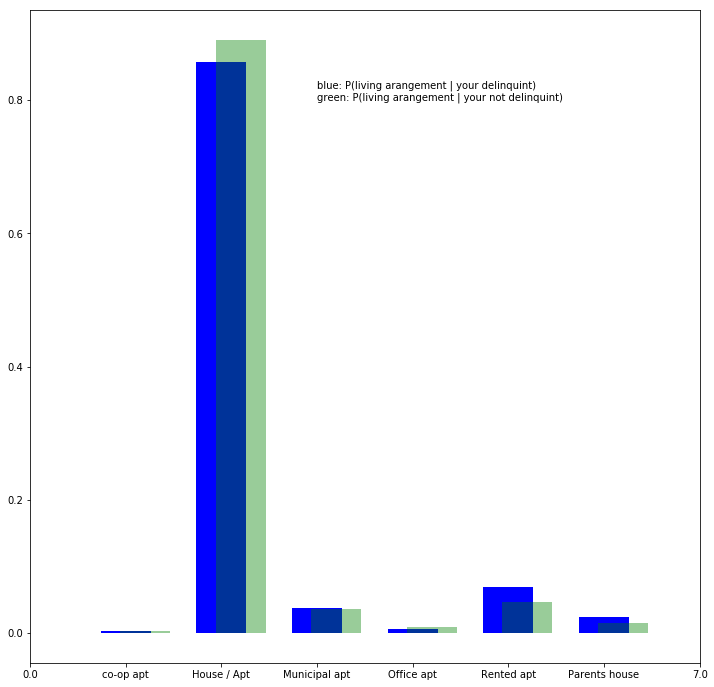

In [18]:
#P(living arangement | your delinquint)
del_coop = len(target_is_one[target_is_one['NAME_HOUSING_TYPE'] =='Co-op apartment']) / len(target_is_one)
del_house = len(target_is_one[target_is_one['NAME_HOUSING_TYPE'] =='House / apartment']) / len(target_is_one)
del_munc_apt = len(target_is_one[target_is_one['NAME_HOUSING_TYPE'] =='Municipal apartment']) / len(target_is_one)
del_office_apt = len(target_is_one[target_is_one['NAME_HOUSING_TYPE'] =='Office apartment']) / len(target_is_one)
del_rented_apt = len(target_is_one[target_is_one['NAME_HOUSING_TYPE'] =='Rented apartment']) / len(target_is_one)
del_parents = len(target_is_one[target_is_one['NAME_HOUSING_TYPE'] =='With parents']) / len(target_is_one)


#P(living arangement | your not delinquint)
not_del_coop = len(target_is_zero[target_is_zero['NAME_HOUSING_TYPE'] =='Co-op apartment']) / len(target_is_zero)
not_del_house = len(target_is_zero[target_is_zero['NAME_HOUSING_TYPE'] =='House / apartment']) / len(target_is_zero)
not_del_munc_apt = len(target_is_zero[target_is_zero['NAME_HOUSING_TYPE'] =='Municipal apartment']) / len(target_is_zero)
not_del_office_apt = len(target_is_zero[target_is_zero['NAME_HOUSING_TYPE'] =='Office apartment']) / len(target_is_zero)
not_del_rented_apt = len(target_is_zero[target_is_zero['NAME_HOUSING_TYPE'] =='Rented apartment']) / len(target_is_zero)
not_del_parents = len(target_is_zero[target_is_zero['NAME_HOUSING_TYPE'] =='With parents']) / len(target_is_zero)



print("P(co-op apt | your delinquint): ",  del_coop)
print("P(apt or house | your delinquint): ",  del_house)
print("P(municipal apt | your delinquint): ",  del_munc_apt)
print("P(office apt | your delinquint): ",  del_office_apt)
print("P(rented apt | your delinquint): ",  del_rented_apt)
print("P(lving with parents | your delinquint): ",  del_parents)

print("P(co-op apt | your not delinquint): ",  not_del_coop)
print("P(apt or house | your not delinquint): ",  not_del_house)
print("P(municipal apt | your not delinquint): ",  not_del_munc_apt)
print("P(office apt | your not delinquint): ",  not_del_office_apt)
print("P(rented apt | your not delinquint): ",  not_del_rented_apt)
print("P(lving with parents | your not delinquint): ",  not_del_parents)



fig = plt.figure(figsize=(12, 12))
house_arangement = fig.add_subplot(111)

house_arangement.set_xlim(0.0, 7.0)

house_arangement.vlines(1.0, 0, del_coop, colors='b', lw=50, alpha=1)
house_arangement.vlines(1.2, 0, not_del_coop, colors='g', lw=50, alpha=0.4)

house_arangement.vlines(2.0, 0, del_house, colors='b', lw=50, alpha=1)
house_arangement.vlines(2.2, 0, not_del_house, colors='g', lw=50, alpha=0.4)

house_arangement.vlines(3.0, 0, del_munc_apt, colors='b', lw=50, alpha=1)
house_arangement.vlines(3.2, 0, not_del_munc_apt, colors='g', lw=50, alpha=0.4)

house_arangement.vlines(4.0, 0, del_office_apt, colors='b', lw=50, alpha=1)
house_arangement.vlines(4.2, 0, not_del_office_apt, colors='g', lw=50, alpha=0.4)

house_arangement.vlines(6.0, 0, del_rented_apt, colors='b', lw=50, alpha=1)
house_arangement.vlines(6.2, 0, not_del_rented_apt, colors='g', lw=50, alpha=0.4)

house_arangement.vlines(5.0, 0, del_parents, colors='b', lw=50, alpha=1)
house_arangement.vlines(5.2, 0, not_del_parents, colors='g', lw=50, alpha=0.4)

ticks=house_arangement.get_xticks().tolist()
ticks[1],ticks[2],ticks[3],ticks[4],ticks[5],ticks[6] = ['co-op apt', 'House / Apt', 'Municipal apt', 'Office apt', 'Rented apt', 'Parents house']
house_arangement.set_xticklabels(ticks)

house_arangement.annotate("blue: P(living arangement | your delinquint) \ngreen: P(living arangement | your not delinquint)", 
                xy = [3,0.8])

Some of the probabilities make to much sense to disregard. Some of these are the probability of living in a house/apt is higher if you ARE NOT delinquint, the probabillity of renting an apartment is higher if you ARE delinquint, and the probability of living with your parents is higher if you ARE delinquint. I think the probability of living in your office given you ARE NOT delinquint makes sense also becuae it seems to imply you own the office, and have minimum financial dependancies such as children to take care of.

In [19]:
#this code below prints out the data corelated with days employed
train['DAYS_EMPLOYED'][:12]

0       -637
1      -1188
2       -225
3      -3039
4      -3038
5      -1588
6      -3130
7       -449
8     365243
9      -2019
10      -679
11    365243
Name: DAYS_EMPLOYED, dtype: int64

If you look at the value for index 8 and 11, you get this massive 365243 value. Every other number is negative. I have no idea how this company rescaled their data, but i'm pretty sure they dicked this column up, so I'm deleting the value 365243, then running it through a histogram

Text(0.5,0,'amount of days in current job')

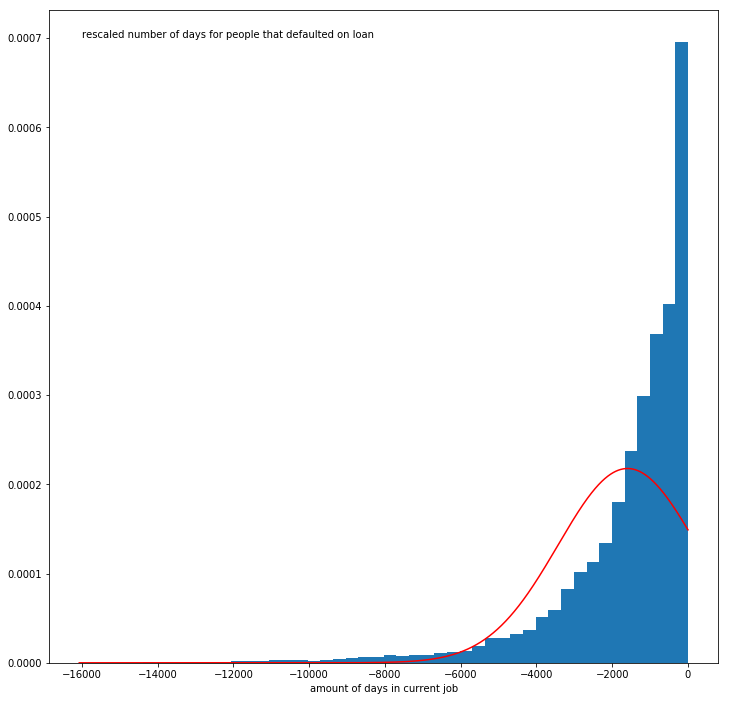

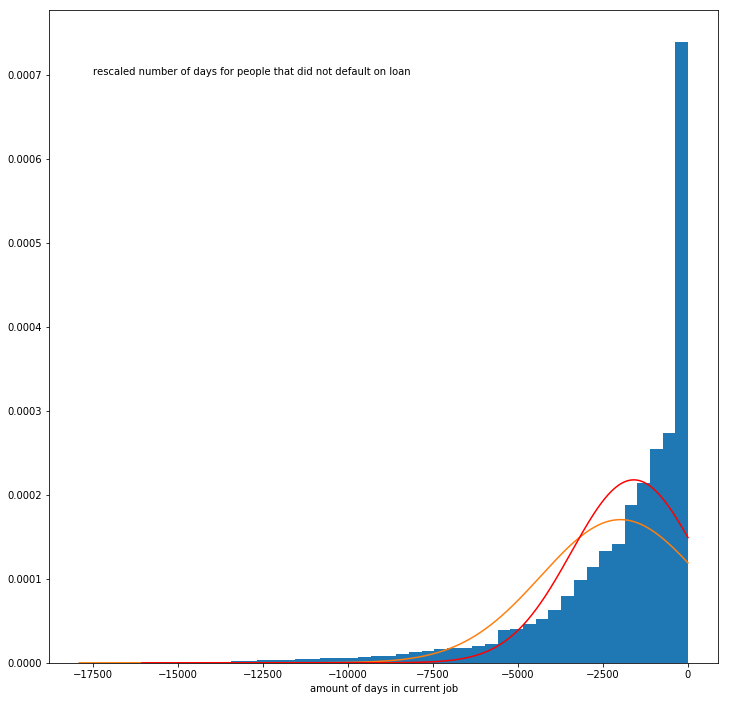

In [20]:
delinquint = np.sort(np.array(target_is_one['DAYS_EMPLOYED'].replace([np.nan,365243],0), dtype = np.float))

"""create histogram"""
fig = plt.figure(figsize=(12, 12))
delinquint_plot = fig.add_subplot(111)
delinquint_plot.hist(delinquint, 48, density = True)

"""gets our histogram density values for our slope and intercept"""
hist_values = np.histogram(delinquint, density = True)
remove_last = np.delete(hist_values[1], -1)

"""get y values pertaining to respective normal distribution"""
fit_delinquint = stats.norm.pdf(delinquint, np.mean(delinquint), np.std(delinquint))
"""plot normal distribution"""
delinquint_plot.plot(delinquint, fit_delinquint, c = 'r')

delinquint_plot.annotate("rescaled number of days for people that defaulted on loan", xy=[-16000,0.0007])
delinquint_plot.set_xlabel('amount of days in current job')





not_delinquint = np.sort(np.array(target_is_zero['DAYS_EMPLOYED'].replace([np.nan,365243],0), dtype = np.float))

"""create histogram"""
fig = plt.figure(figsize=(12, 12))
not_delinquint_plot = fig.add_subplot(111)
not_delinquint_plot.hist(not_delinquint, 48, density = True)

"""gets our histogram density values for our slope and intercept"""
hist_values = np.histogram(not_delinquint, density = True)
remove_last = np.delete(hist_values[1], -1)

"""get y values pertaining to respective normal distribution"""
fit_not_delinquint = stats.norm.pdf(not_delinquint, np.mean(not_delinquint), np.std(not_delinquint))
"""plot normal distribution"""
not_delinquint_plot.plot(not_delinquint, fit_not_delinquint)
not_delinquint_plot.plot(delinquint, fit_delinquint, c = 'r')

not_delinquint_plot.annotate("rescaled number of days for people that did not default on loan", xy=[-17500,0.0007])
not_delinquint_plot.set_xlabel('amount of days in current job')

After deleting that outlier, 365243, we see a difference between distreibutions regarding the amount of days our clients worked at a specific position. The red distribution line, which cooresponds to delinquint clients shows a higher peak than the orange distribution line, which coorespsonds to non delinquint clients. These results should theoreticall be opposite of what I am seeing, but since I have no idea how this company rescaled this data, and why this data is negative, it is pretty difficult to derive any type of logic from this feature. Either way, I'm going to initially reengineer this data to have mean 0, and see if it performs better than just deleting the data

Text(0.5,17.2,'amount of days in current job')

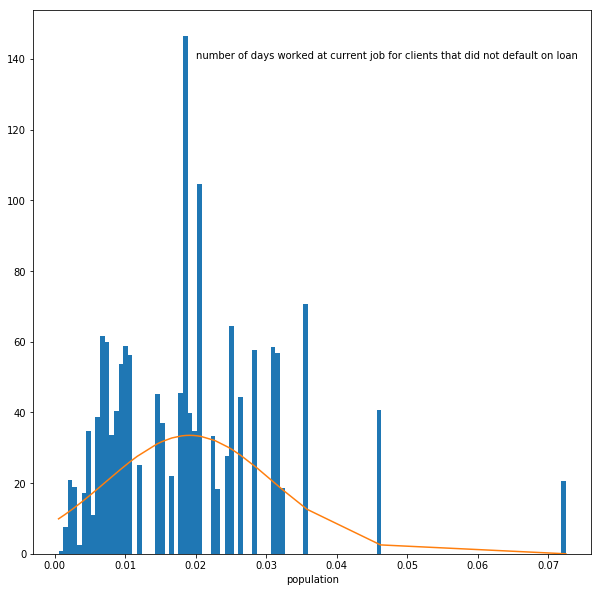

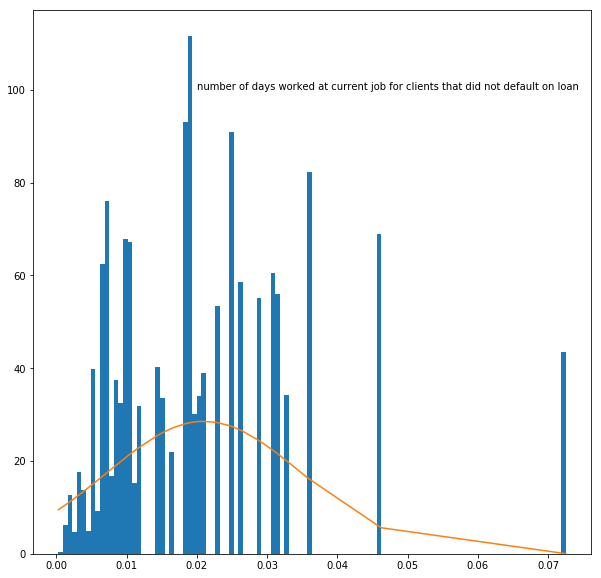

In [21]:
delinquint_population = np.sort(np.array(target_is_one['REGION_POPULATION_RELATIVE']))

"""create histogram"""
fig = plt.figure(figsize=(10, 10))
delinquint_population_plot = fig.add_subplot(111)
delinquint_population_plot.hist(delinquint_population, 110, density = True)
"""get y values pertaining to respective normal distribution"""
fit_delinquint = stats.norm.pdf(delinquint_population, np.mean(delinquint_population), np.std(delinquint_population))
"""plot normal distribution"""
delinquint_population_plot.plot(delinquint_population, fit_delinquint)

delinquint_population_plot.annotate("number of days worked at current job for clients that did not default on loan", xy=[0.02,140])
delinquint_population_plot.set_xlabel('population')


not_delinquint_population = np.sort(np.array(target_is_zero['REGION_POPULATION_RELATIVE']))

"""create histogram"""
fig = plt.figure(figsize=(10, 10))
not_delinquint_population_plot = fig.add_subplot(111)
not_delinquint_population_plot.hist(not_delinquint_population, 110, density = True)
"""get y values pertaining to respective normal distribution"""
fit_not_delinquint = stats.norm.pdf(not_delinquint_population, np.mean(not_delinquint_population), np.std(not_delinquint_population))
"""plot normal distribution"""
not_delinquint_population_plot.plot(not_delinquint_population, fit_not_delinquint)

not_delinquint_population_plot.annotate("number of days worked at current job for clients that did not default on loan", xy=[0.02,100])
delinquint_plot.set_xlabel('amount of days in current job')

The biggest difference I see here is that big spike at around 0.017 for the population for people that defaulted on a loan. I'm also seeing higher spikes for the population for people that did not default on loan for volumes 0.046 and 0.072. These volumes seem to be coorleated with specific locations, and since these dumbasses didn't put geoprahpic location as a variable, I deem this feature very important! Initially I'm going to keep the data scaled as is, but I may want to normalize this data and run it through the algorithm to see if we get a more efficient error.

Text(0.5,0,'age(rescaled)')

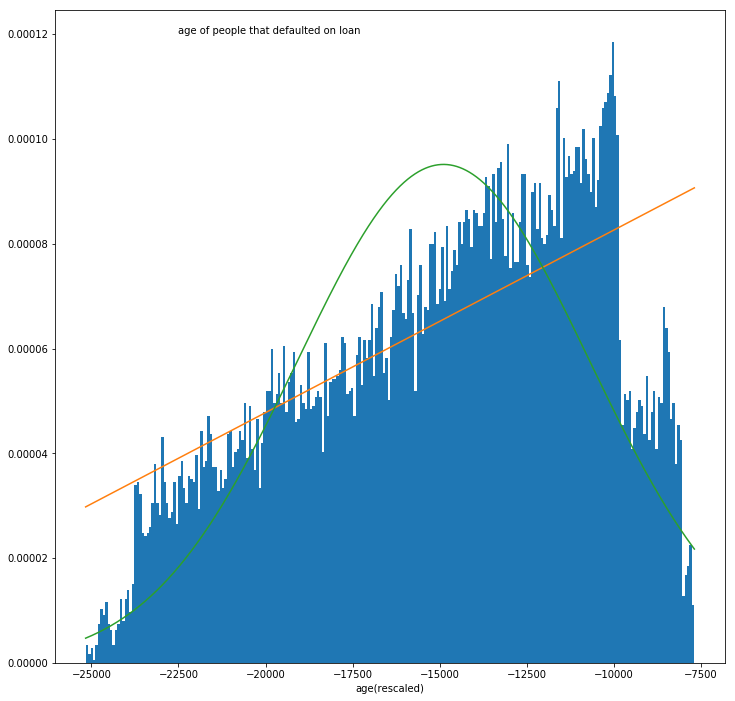

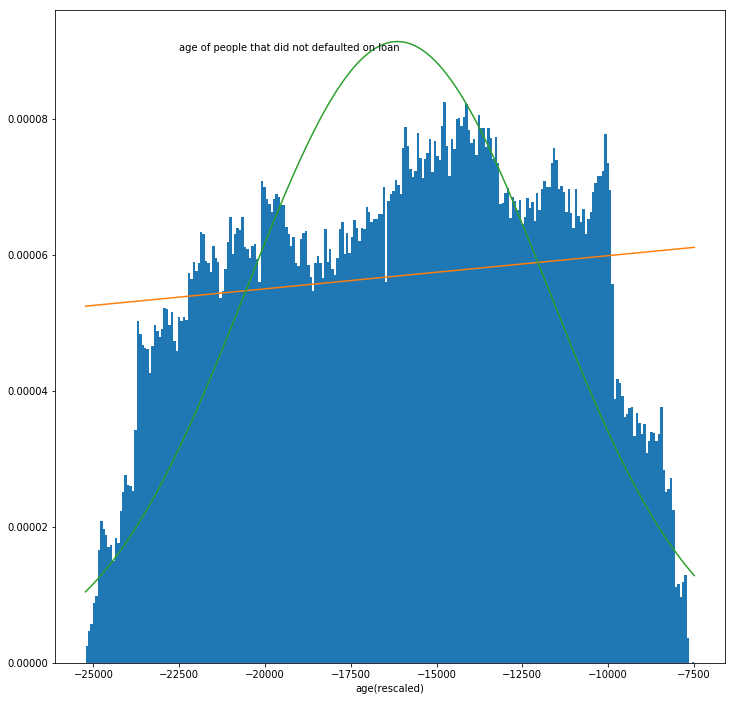

In [22]:
delinquint_birth = np.sort(np.array(target_is_one['DAYS_BIRTH'], dtype = np.float))

"""create histogram"""
fig = plt.figure(figsize=(12, 12))
delinquint_birth_plot = fig.add_subplot(111)
delinquint_birth_plot.hist(delinquint_birth, 250, density = True)

"""gets our histogram density values for our slope and intercept"""
hist_values = np.histogram(delinquint_birth, density = True)
remove_last = np.delete(hist_values[1], -1)
"""this gets our slope and intercept"""
a, b = np.polyfit(remove_last, hist_values[0], deg=1)
"""gets y value by multiplying our x value by our slope and adds the intercept"""
regression_line = [(i * a + b) for i in delinquint_birth]
"""plot trend line"""
delinquint_birth_plot.plot(delinquint_birth, regression_line)

"""get y values pertaining to respective normal distribution"""
fit_delinquint = stats.norm.pdf(delinquint_birth, np.mean(delinquint_birth), np.std(delinquint_birth))
"""plot normal distribution"""
delinquint_birth_plot.plot(delinquint_birth, fit_delinquint)
delinquint_birth_plot.annotate("age of people that defaulted on loan", xy=[-22500,0.00012])
delinquint_birth_plot.set_xlabel('age(rescaled)')


not_delinquint_birth = np.sort(np.array(target_is_zero['DAYS_BIRTH'], dtype = np.float))

"""create histogram"""
fig = plt.figure(figsize=(12, 12))
not_delinquint_birth_plot = fig.add_subplot(111)
not_delinquint_birth_plot.hist(not_delinquint_birth, 250, density = True)

"""gets our histogram density values for our slope and intercept"""
hist_values = np.histogram(not_delinquint_birth, density = True)
remove_last = np.delete(hist_values[1], -1)
"""this gets our slope and intercept"""
a, b = np.polyfit(remove_last, hist_values[0], deg=1)
"""gets y value by multiplying our x value by our slope and adds the intercept"""
regression_line = [(i * a + b) for i in not_delinquint_birth]
"""plot trend line"""
not_delinquint_birth_plot.plot(not_delinquint_birth, regression_line)

"""get y values pertaining to respective normal distribution"""
fit_not_delinquint = stats.norm.pdf(not_delinquint_birth, np.mean(not_delinquint_birth), np.std(not_delinquint_birth))
"""plot normal distribution"""
not_delinquint_birth_plot.plot(not_delinquint_birth, fit_not_delinquint)

not_delinquint_birth_plot.annotate("age of people that did not defaulted on loan", xy=[-22500,0.00009])
not_delinquint_birth_plot.set_xlabel('age(rescaled)')


This is data is pretty interesting. We get a big difference in distributions between people that defaulted on a loan and people that didn't default on a loan. For people that didn't default on a loan, we get a realatively normal distribution with mean -16250. For people that defaulted on a loan, we get a left skewed distribution with mean 15000. For people that defaulted on a loan, as the data(age) becomes more positive, we get a geater probability for people defaulting on a loan. We then get this huge dropoff in probbility for both histograms at around the 8500 mark. I really have no idea why the data was reengineered this was, but I beleive I'm just going to run this data through a standard normal distribution when I run it through my neural network. The data will look like this below:

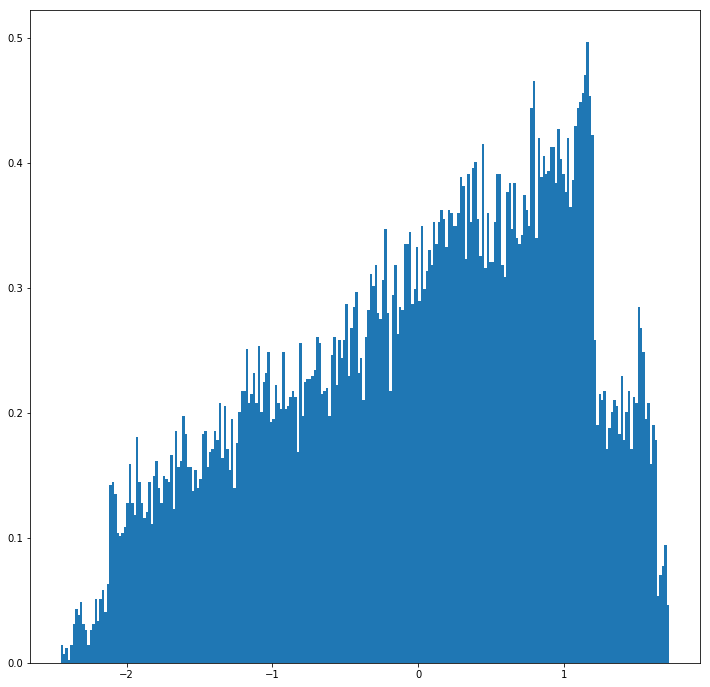

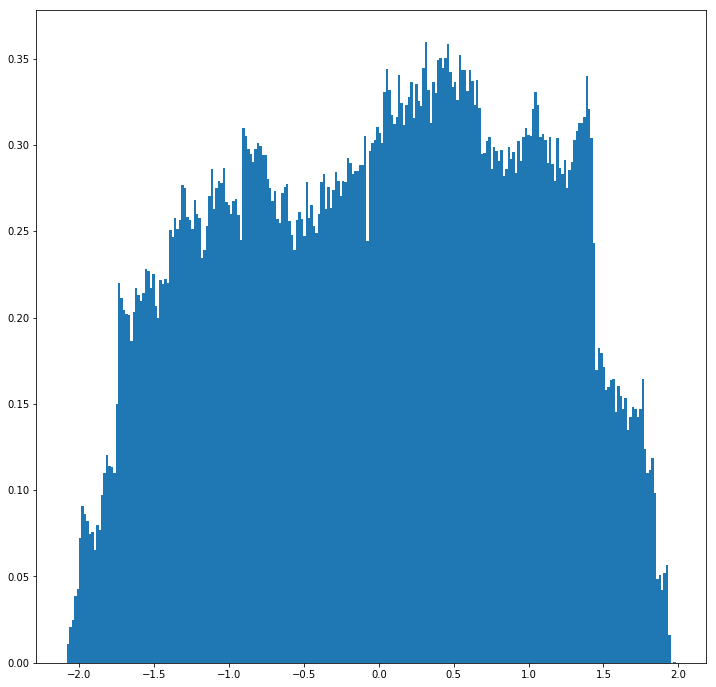

In [23]:
norm = StandardScaler()
delinquint = norm.fit_transform(np.reshape(delinquint_birth, [-1,1]) )
delinquint = np.reshape(delinquint, [-1])

fig = plt.figure(figsize=(12, 12))
delinquint_birth_plot = fig.add_subplot(111)
standard_plot_one = delinquint_birth_plot.hist(delinquint, 250, density = True)

norm = StandardScaler()
not_del = norm.fit_transform(np.reshape(not_delinquint_birth, [-1,1]) )
not_del = np.reshape(not_del, [-1])

fig = plt.figure(figsize=(12, 12))
not_delinquint_birth_plot = fig.add_subplot(111)
standard_plot_two = not_delinquint_birth_plot.hist(not_del, 250, density = True)

As you can see. The distribution remains the same, except now both features have mean 0 and are scaled to their respective unit variance. Now lets take a look at the number of days before application the client changed his application.

Text(0.5,0,'registration(rescaled)')

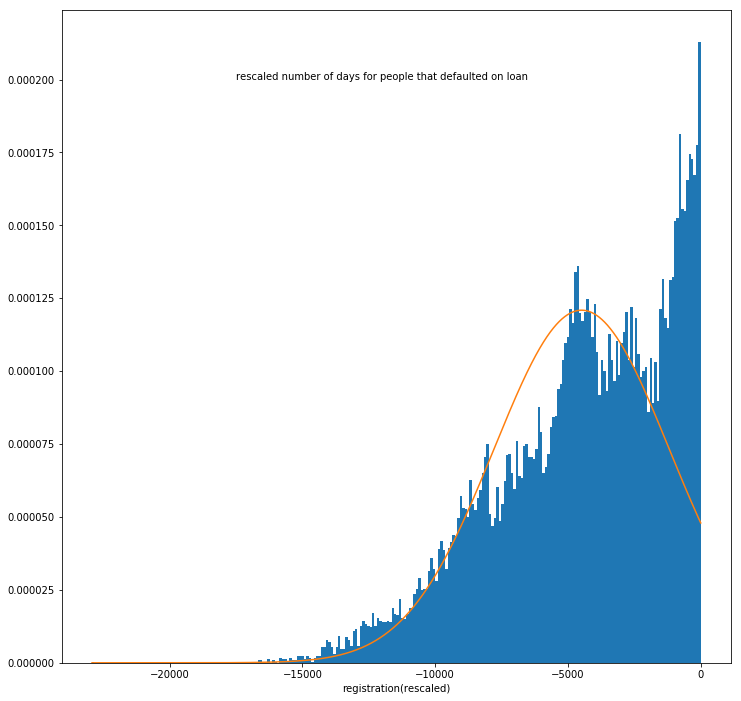

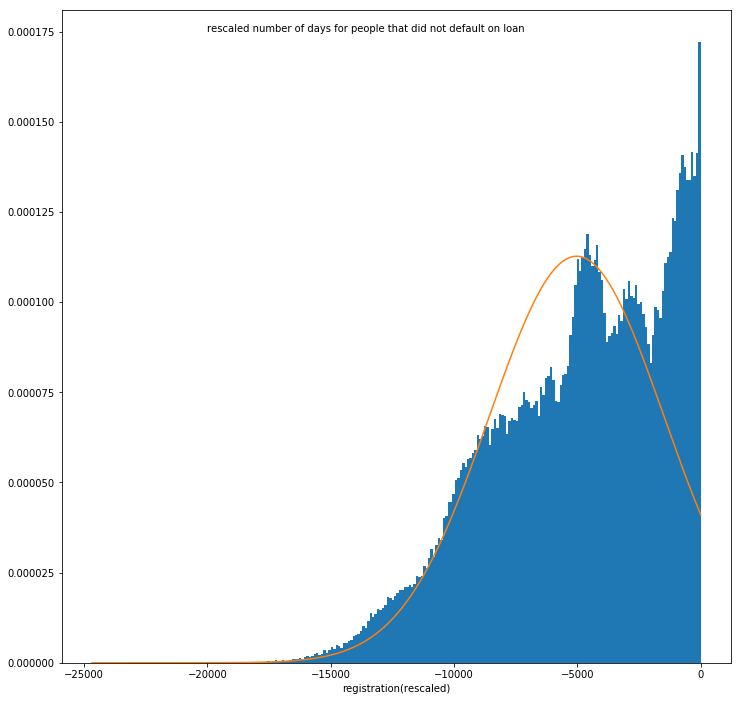

In [24]:
delinquint = np.sort(np.array(target_is_one['DAYS_REGISTRATION'], dtype = np.float))

"""create histogram"""
fig = plt.figure(figsize=(12, 12))
delinquint_plot = fig.add_subplot(111)
delinquint_plot.hist(delinquint, 250, density = True)

"""gets our histogram density values for our slope and intercept"""
hist_values = np.histogram(delinquint, density = True)
remove_last = np.delete(hist_values[1], -1)

"""get y values pertaining to respective normal distribution"""
fit_delinquint = stats.norm.pdf(delinquint, np.mean(delinquint), np.std(delinquint))

"""plot normal distribution"""
delinquint_plot.plot(delinquint, fit_delinquint)

delinquint_plot.annotate("rescaled number of days for people that defaulted on loan", xy=[-17500,0.000200])
delinquint_plot.set_xlabel('registration(rescaled)')




not_delinquint = np.sort(np.array(target_is_zero['DAYS_REGISTRATION'], dtype = np.float))

"""create histogram"""
fig = plt.figure(figsize=(12, 12))
not_delinquint_plot = fig.add_subplot(111)
not_delinquint_plot.hist(not_delinquint, 250, density = True)

"""gets our histogram density values for our slope and intercept"""
hist_values = np.histogram(not_delinquint, density = True)
remove_last = np.delete(hist_values[1], -1)

"""get y values pertaining to respective normal distribution"""
fit_not_delinquint = stats.norm.pdf(not_delinquint, np.mean(not_delinquint), np.std(not_delinquint))
"""plot normal distribution"""
not_delinquint_plot.plot(not_delinquint, fit_not_delinquint)

not_delinquint_plot.annotate("rescaled number of days for people that did not default on loan", xy=[-20000,0.000175])
not_delinquint_plot.set_xlabel('registration(rescaled)')

I am not sure what changing of registartion has to do with how likely someone is to pay back a loan, and I think these two histograms show that. There does not seem to be much of a differnece in the distributions. I think for the time being, I am going to throw this dimension away. 

Text(1,30,'blue: probability of delinquint client giving false information \ngreen: probability of non delinquint client giving false information')

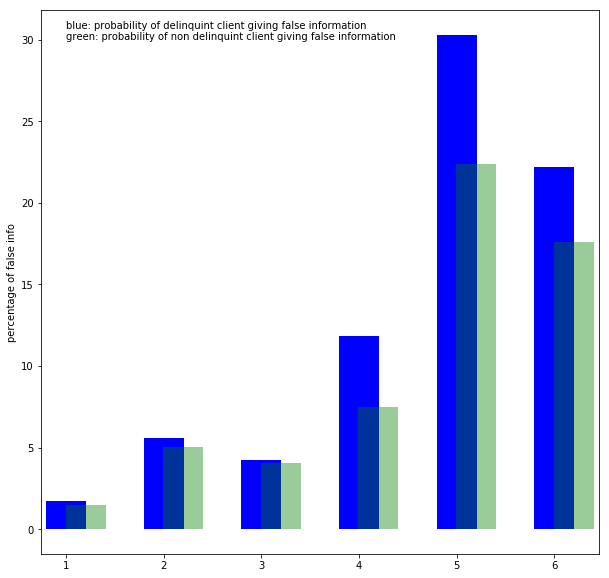

In [25]:
#P(client's permanent address does not match contact address | delinquint)
del_one = len(target_is_one[target_is_one['REG_REGION_NOT_LIVE_REGION'] == 1 ]) / len(target_is_one) * 100
#P(client's permanent address does not match contact address | not delinquint)
not_del_one = len(target_is_zero[target_is_zero['REG_REGION_NOT_LIVE_REGION'] == 1 ]) / len(target_is_zero) * 100

#P(client's permanent address does not match work address | delinquint)
del_two = len(target_is_one[target_is_one['REG_REGION_NOT_WORK_REGION'] == 1 ]) / len(target_is_one) * 100
#P(client's permanent address does not match work address  | your not delinquint)
not_del_two = len(target_is_zero[target_is_zero['REG_REGION_NOT_WORK_REGION'] == 1 ]) / len(target_is_zero) * 100

#P(client's contact address does not match work address | your delinquint)
del_three = len(target_is_one[target_is_one['LIVE_REGION_NOT_WORK_REGION'] == 1 ]) / len(target_is_one) * 100
#P(client's contact address does not match work address | your not delinquint)
not_del_three = len(target_is_zero[target_is_zero['LIVE_REGION_NOT_WORK_REGION'] == 1 ]) / len(target_is_zero) * 100

#P(client's permanent address does not match contact address | your delinquint)
del_four = len(target_is_one[target_is_one['REG_CITY_NOT_LIVE_CITY'] == 1 ]) / len(target_is_one) * 100
#P(client's permanent address does not match contact address | your not delinquint)
not_del_four = len(target_is_zero[target_is_zero['REG_CITY_NOT_LIVE_CITY'] == 1 ]) / len(target_is_zero) * 100

#P(client's permanent address does not match work address | your delinquint)
del_five = len(target_is_one[target_is_one['REG_CITY_NOT_WORK_CITY'] == 1 ]) / len(target_is_one) * 100
#P(client's permanent address does not match work address | your not delinquint)
not_del_five = len(target_is_zero[target_is_zero['REG_CITY_NOT_WORK_CITY'] == 1 ]) / len(target_is_zero) * 100

#P(client's contact address does not match work address | your delinquint)
del_six = len(target_is_one[target_is_one['LIVE_CITY_NOT_WORK_CITY'] == 1 ]) / len(target_is_one) * 100
#P(client's contact address does not match work address | your not delinquint)
not_del_six = len(target_is_zero[target_is_zero['LIVE_CITY_NOT_WORK_CITY'] == 1 ]) / len(target_is_zero) * 100

fig = plt.figure(figsize=(10, 10))
false_info = fig.add_subplot(111)

false_info.set_xticks([1,2,3,4,5,6])

false_info.vlines(1.0, 0, del_one, colors='b', lw=40, alpha=1)
false_info.vlines(1.2, 0, not_del_one, colors='g', lw=40, alpha=0.4)

false_info.vlines(2.0, 0, del_two, colors='b', lw=40, alpha=1)
false_info.vlines(2.2, 0, not_del_two, colors='g', lw=40, alpha=0.4)

false_info.vlines(3.0, 0, del_three, colors='b', lw=40, alpha=1)
false_info.vlines(3.2, 0, not_del_three, colors='g', lw=40, alpha=0.4)

false_info.vlines(4.0, 0, del_four, colors='b', lw=40, alpha=1)
false_info.vlines(4.2, 0, not_del_four, colors='g', lw=40, alpha=0.4)

false_info.vlines(5.0, 0, del_five, colors='b', lw=40, alpha=1)
false_info.vlines(5.2, 0, not_del_five, colors='g', lw=40, alpha=0.4)

false_info.vlines(6.0, 0, del_six, colors='b', lw=40, alpha=1)
false_info.vlines(6.2, 0, not_del_six, colors='g', lw=40, alpha=0.4)

false_info.set_ylabel('percentage of false info')
false_info.annotate("blue: probability of delinquint client giving false information \ngreen: probability of non delinquint client giving false information", xy = [1.0,30])

There is obviously a greater probability of giving false information if you are delinquint(blue lines), therefore, I deem this dimension relevant. 

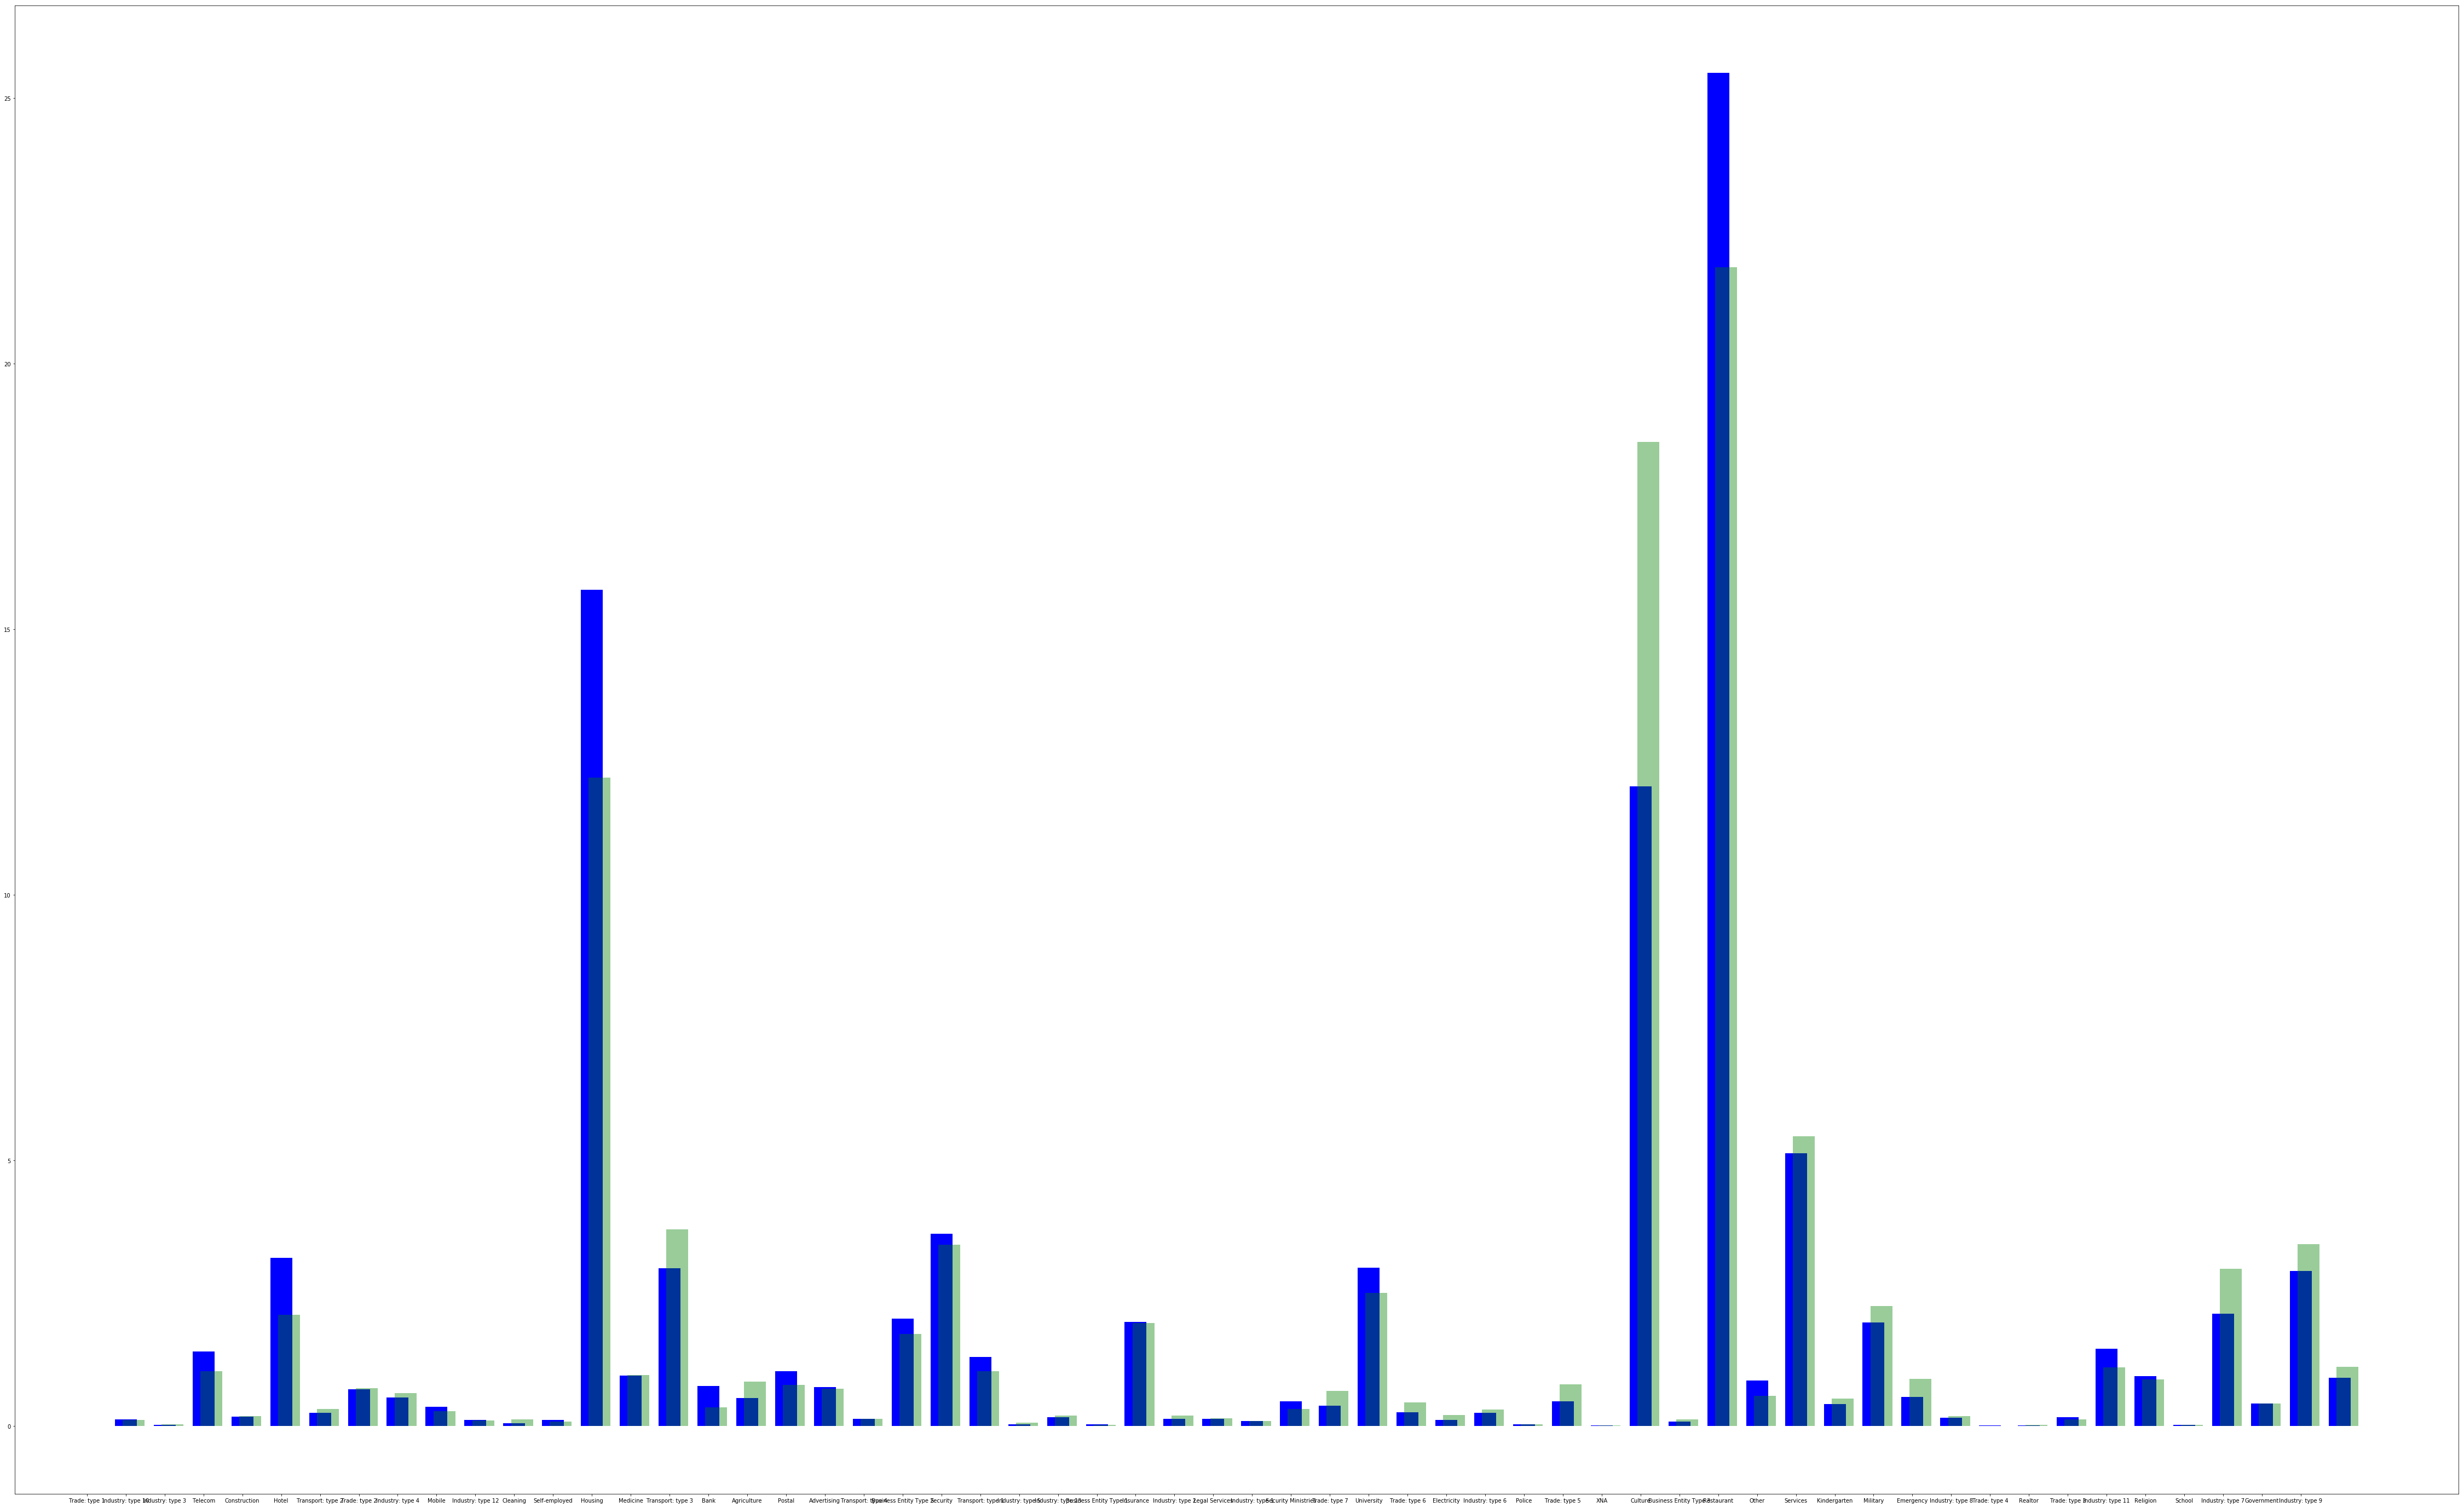

In [26]:

fig = plt.figure(figsize=(80, 50))
org_type = fig.add_subplot(111)
"""get the amount of variables in this dimension"""
x_vars = [i for i in range(len(set(train['ORGANIZATION_TYPE'])))]
org_type.set_xticks(x_vars)

increase = 0
for i in set(train['ORGANIZATION_TYPE']):
    #P(client's permanent address does not match contact address | delinquint)
    del_one = len(target_is_one[target_is_one['ORGANIZATION_TYPE'] == '{}'.format(i) ]) / len(target_is_one) * 100
    #P(client's permanent address does not match contact address | not delinquint)
    not_del_one = len(target_is_zero[target_is_zero['ORGANIZATION_TYPE'] == '{}'.format(i) ]) / len(target_is_zero) * 100
    
    org_type.vlines((1.0 + increase), 0, del_one, colors='b', lw=40, alpha=1)
    org_type.vlines((1.2 + increase), 0, not_del_one, colors='g', lw=40, alpha=0.4)
    increase += 1
    
variables = list(set(train['ORGANIZATION_TYPE']))    
ticks=org_type.get_xticks().tolist()
ticks = [variables[e] for e,i in enumerate(ticks)]
x_tickers = org_type.set_xticklabels(ticks)

For the time being, I am going to delete this dimension, but I believe this dimension holds valuable data. I just dont feel like reengineering the dimsion right now

Text(0.5,0,'days since last phone change')

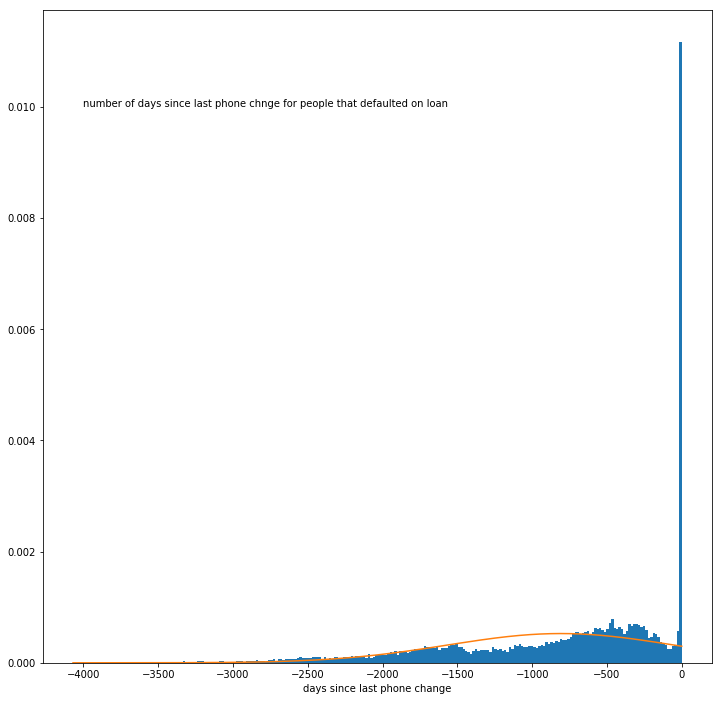

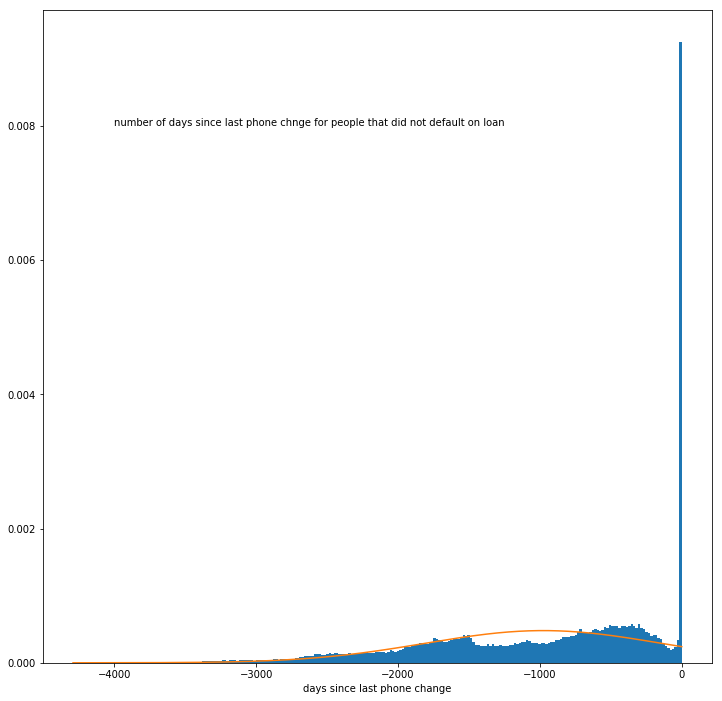

In [27]:
delinquint = np.sort(np.array(target_is_one['DAYS_LAST_PHONE_CHANGE'], dtype = np.float))

"""create histogram"""
fig = plt.figure(figsize=(12, 12))
delinquint_plot = fig.add_subplot(111)
delinquint_plot.hist(delinquint, 250, density = True)

"""gets our histogram density values for our slope and intercept"""
hist_values = np.histogram(delinquint, density = True)
remove_last = np.delete(hist_values[1], -1)

"""get y values pertaining to respective normal distribution"""
fit_delinquint = stats.norm.pdf(delinquint, np.mean(delinquint), np.std(delinquint))

"""plot normal distribution"""
delinquint_plot.plot(delinquint, fit_delinquint)

delinquint_plot.annotate("number of days since last phone chnge for people that defaulted on loan", xy=[-4000,0.01])
delinquint_plot.set_xlabel('days since last phone change')




not_delinquint = np.sort(np.array(target_is_zero['DAYS_LAST_PHONE_CHANGE'].replace(np.nan, 0), dtype = np.float))

"""create histogram"""
fig = plt.figure(figsize=(12, 12))
not_delinquint_plot = fig.add_subplot(111)
not_delinquint_plot.hist(not_delinquint, 250, density = True)

"""gets our histogram density values for our slope and intercept"""
hist_values = np.histogram(not_delinquint, density = True)
remove_last = np.delete(hist_values[1], -1)

"""get y values pertaining to respective normal distribution"""
fit_not_delinquint = stats.norm.pdf(not_delinquint, np.mean(not_delinquint), np.std(not_delinquint))
"""plot normal distribution"""
not_delinquint_plot.plot(not_delinquint, fit_not_delinquint)

not_delinquint_plot.annotate("number of days since last phone chnge for people that did not default on loan", xy=[-4000,0.008])
not_delinquint_plot.set_xlabel('days since last phone change')

As you can see, our values are dominated by the values close to 0. Again, I have no idea how this data was rescaled. These two plots show us that being delinquint gives a greater probability of being closer to 0. whether these means that delnquint clients are more likely to have a new phone remains a mystery. Lets go ahaed and get rid of values 0, -1, -2, and -3 to smooth out the histogram

Text(0.5,0,'days since last phone change')

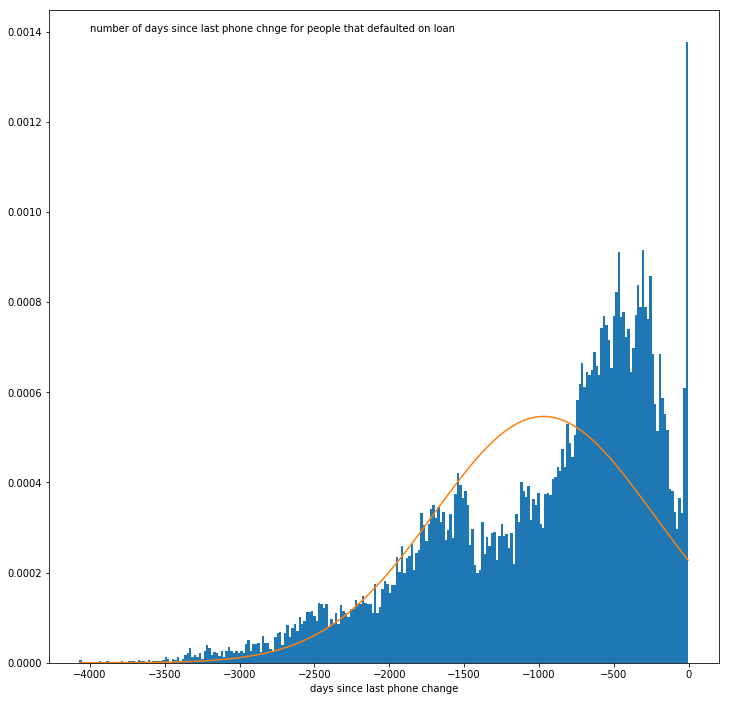

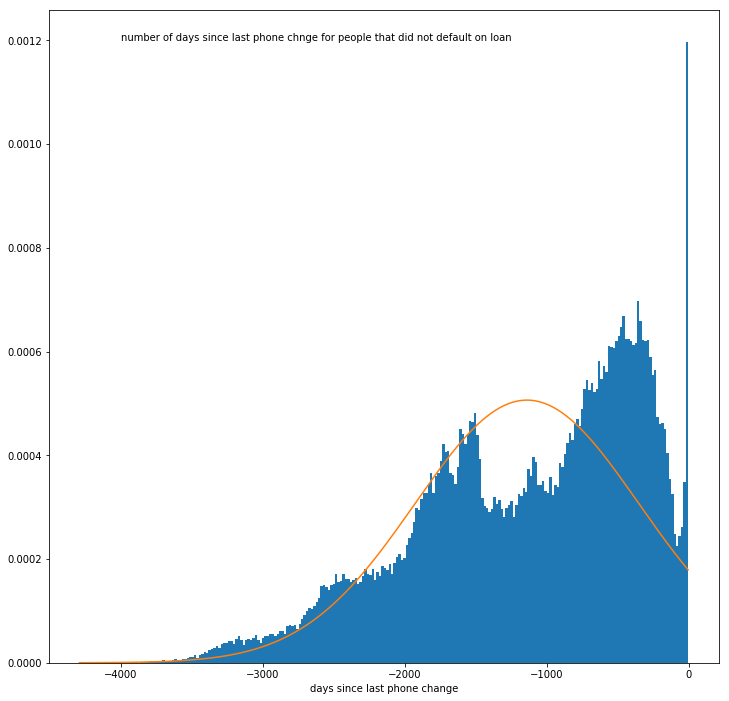

In [28]:
delinquint = np.sort(np.array(target_is_one['DAYS_LAST_PHONE_CHANGE'], dtype = np.float))
delinquint = [i for i in delinquint if i != 0 and i != -1 and i != -2 and i != -3]

"""create histogram"""
fig = plt.figure(figsize=(12, 12))
delinquint_plot = fig.add_subplot(111)
delinquint_plot.hist(delinquint, 250, density = True)

"""gets our histogram density values for our slope and intercept"""
hist_values = np.histogram(delinquint, density = True)
remove_last = np.delete(hist_values[1], -1)

"""get y values pertaining to respective normal distribution"""
fit_delinquint = stats.norm.pdf(delinquint, np.mean(delinquint), np.std(delinquint))

"""plot normal distribution"""
delinquint_plot.plot(delinquint, fit_delinquint)

delinquint_plot.annotate("number of days since last phone chnge for people that defaulted on loan", xy=[-4000,0.0014])
delinquint_plot.set_xlabel('days since last phone change')




not_delinquint = np.sort(np.array(target_is_zero['DAYS_LAST_PHONE_CHANGE'].replace(np.nan, 0), dtype = np.float))
not_delinquint = [i for i in not_delinquint if i != 0 and i != -1and i != -2 and i != -3]

"""create histogram"""
fig = plt.figure(figsize=(12, 12))
not_delinquint_plot = fig.add_subplot(111)
not_delinquint_plot.hist(not_delinquint, 250, density = True)

"""gets our histogram density values for our slope and intercept"""
hist_values = np.histogram(not_delinquint, density = True)
remove_last = np.delete(hist_values[1], -1)

"""get y values pertaining to respective normal distribution"""
fit_not_delinquint = stats.norm.pdf(not_delinquint, np.mean(not_delinquint), np.std(not_delinquint))
"""plot normal distribution"""
not_delinquint_plot.plot(not_delinquint, fit_not_delinquint)

not_delinquint_plot.annotate("number of days since last phone chnge for people that did not default on loan", xy=[-4000,0.0012])
not_delinquint_plot.set_xlabel('days since last phone change')

our delinquint clients have a greater mean than our non delinquint clients

I analyzed FLAG_MOBIL to HOUR_APPR_PROCESS_START, but jupyter fucked me and didnt save the work. I remeber HOUR_APPR_PROCESS_START, WEEKDAY_APPR_PROCESS_START were irrelevant and disguarded. CNT_FAM_MEMBERS was also irrelevant. REGION_RATING_CLIENT was relevant, but REGION_RATING_CLIENT_W_CITY was a copy so I got rid of REGION_RATING_CLIENT_W_CITY. 